IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

In [ ]:
#Yara Khamis - groupe 
#Iarina Nistor - groupe 3

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [12]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut
from iads import utils_nettoyage as net
# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust
from sklearn.preprocessing import normalize
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [2]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [3]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [4]:
#On transforme la colonne "stopword" du dataset en liste et on stocke le resultat dans stopwords_list
stopwords_list = stop_words_df['stopword'].tolist()

# --- Avec stopwords : version complète ---
lesmots_avec_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), [])  # garder tous les mots
    lesmots_avec_stopwords.append(mots)
news_avec_stopwords = newsgroups_df.copy()
news_avec_stopwords['les_mots'] = lesmots_avec_stopwords

# --- Sans stopwords : nettoyage standard ---
lesmots_sans_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), stopwords_list)  # enlever les stopwords
    lesmots_sans_stopwords.append(mots)
news_sans_stopwords = newsgroups_df.copy()
news_sans_stopwords['les_mots'] = lesmots_sans_stopwords

In [5]:
news_avec_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[i, am, sure, some, bashers, of, pens, fans, a..."
1,My brother is in the market for a high-perform...,3,"[my, brother, is, in, the, market, for, a, hig..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, you, said, what, you, dream, about, ..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, it's, the, scsi, card, doing, the, dma..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, i, have, an, old, jasmine, drive, which, i..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, from, nyeda, cnsvax, uwec, edu, david, ny..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[not, in, isolated, ground, recepticles, usual..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[i, just, installed, a, dx2, 66, cpu, in, a, c..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[wouldn't, this, require, a, hyper, sphere, in..."


In [6]:
news_sans_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


## Tâches à réaliser

### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


In [7]:
# === RÉDUCTION DIRECTE DE LA BASE POUR TESTS RAPIDES ===

# Nombre max d'exemples à utiliser
taille_reduite = 1500

# Réduction directe sur la base nettoyée sans stopwords
if len(news_sans_stopwords) > taille_reduite:
    # Échantillonnage reproductible
    news_sans_stopwords = news_sans_stopwords.sample(n=taille_reduite, random_state=42).reset_index(drop=True)
    print(f"Base réduite à {taille_reduite} exemples.")
else:
    print("Pas de réduction nécessaire (déjà inférieur à 200).")

# Extraction de y à partir du DataFrame réduit
y = news_sans_stopwords['target'].to_numpy()

Base réduite à 1500 exemples.


In [8]:
textes = [' '.join(mots) for mots in news_sans_stopwords['les_mots']]

vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(textes)
X_norm = normalize(X.toarray(), norm='l2')
# Réponse (vraies classes)
y = news_sans_stopwords['target'].to_numpy()
print("X_norm et y reconstruits.")
print("X_norm shape :", X_norm.shape)
print("y shape      :", y.shape)

X_norm et y reconstruits.
X_norm shape : (1500, 1500)
y shape      : (1500,)


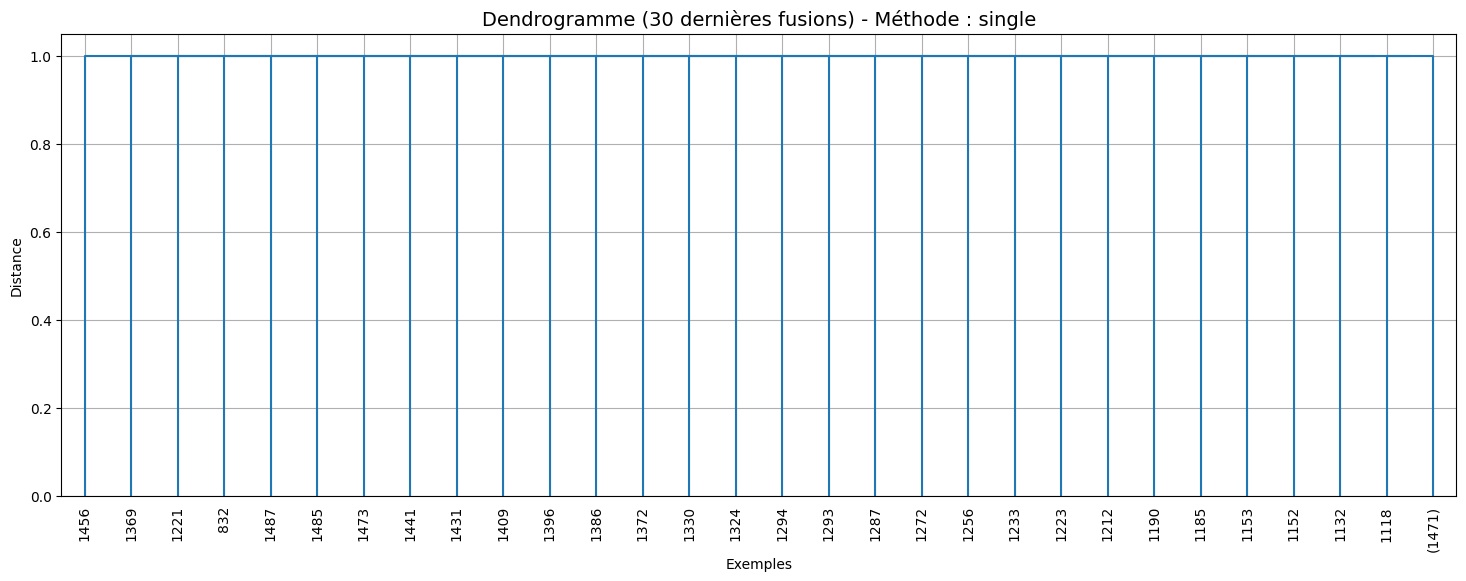

Répartition des clusters : {1: 1496, 2: 1, 3: 1, 4: 1, 5: 1}
Silhouette : -0.01654314028686994
ARI        : 0.00010450292012750412
V-measure  : 0.005651057878065335


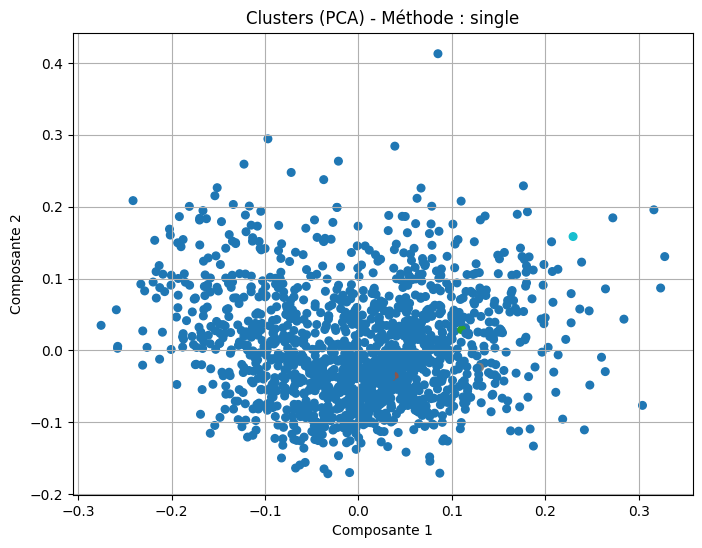

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Clustering hiérarchique (single linkage)
Z_single = linkage(X_norm, method='single')
K = 5

# Étape 2 : Seuil de couleur pour visualiser les groupes
color_threshold = Z_single[-K, 2]

# Étape 3 : Dendrogramme tronqué (30 dernières fusions) avec coloration
plt.figure(figsize=(18, 6))
plt.title("Dendrogramme (30 dernières fusions) - Méthode : single", fontsize=14)
dendrogram(
    Z_single,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold=color_threshold
)
plt.xlabel("Exemples")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Étape 4 : Création des clusters
labels_single = fcluster(Z_single, t=K, criterion='maxclust')

# Étape 5 : Évaluation
print("Répartition des clusters :", dict(zip(*np.unique(labels_single, return_counts=True))))
print("Silhouette :", silhouette_score(X_norm, labels_single))
print("ARI        :", adjusted_rand_score(y, labels_single))
print("V-measure  :", v_measure_score(y, labels_single))

# Étape 6 : Visualisation PCA
X_proj = PCA(n_components=2).fit_transform(X_norm)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels_single, cmap='tab10', s=30)
plt.title("Clusters (PCA) - Méthode : single")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()




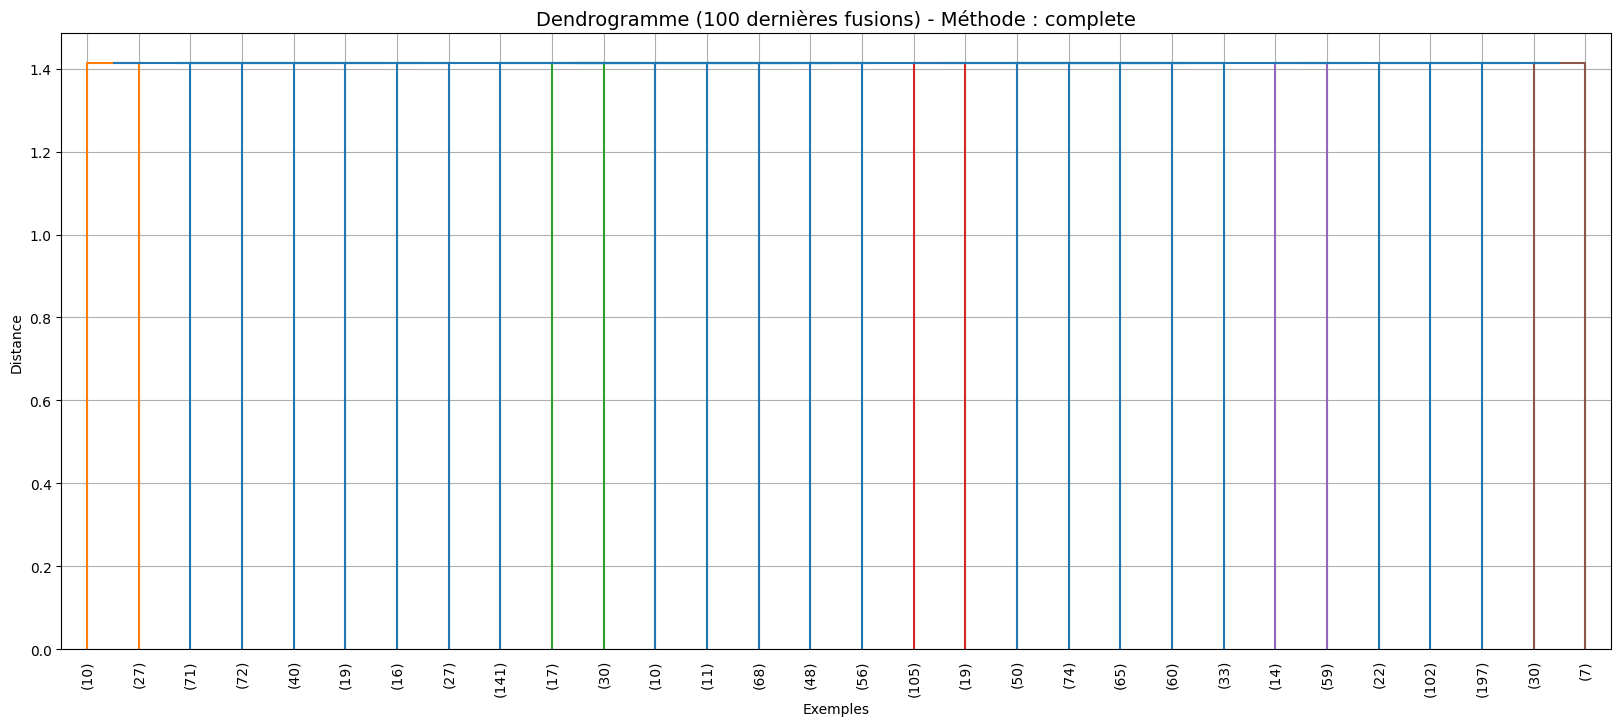

Répartition des clusters : {1: 282, 2: 381, 3: 406, 4: 431}
Silhouette : -0.012215886605561527
ARI        : 0.003394749477287331
V-measure  : 0.018737768191552234


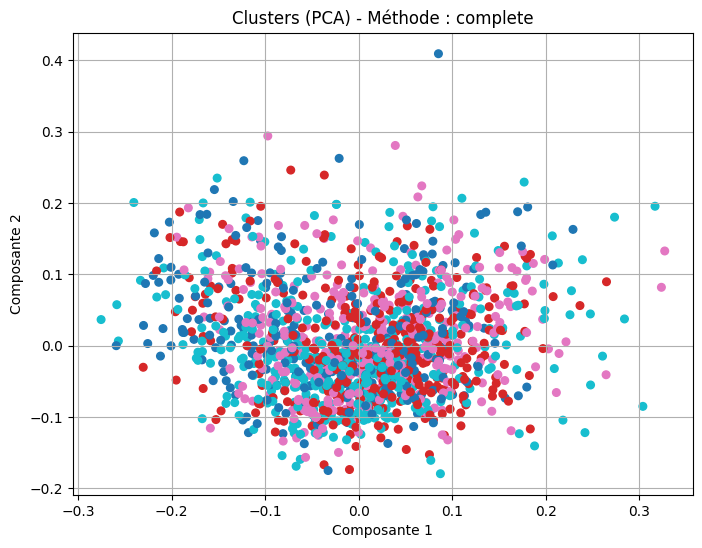

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
import matplotlib.pyplot as plt
import numpy as np

# CHA avec méthode complete
Z_complete = linkage(X_norm, method='complete')
K = 5

# Seuil pour colorer le dendrogramme
color_threshold = Z_complete[-K, 2]

# Création des clusters
labels_complete = fcluster(Z_complete, t=K, criterion='maxclust')

# DENDROGRAMME (troncature sur les 100 dernières feuilles, avec coloration)
plt.figure(figsize=(20, 8))
plt.title("Dendrogramme (100 dernières fusions) - Méthode : complete", fontsize=14)
dendrogram(
    Z_complete,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold=color_threshold  # Coloration des branches
)
plt.xlabel("Exemples")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Évaluation
print("Répartition des clusters :", dict(zip(*np.unique(labels_complete, return_counts=True))))
print("Silhouette :", silhouette_score(X_norm, labels_complete))
print("ARI        :", adjusted_rand_score(y, labels_complete))
print("V-measure  :", v_measure_score(y, labels_complete))

# VISUALISATION PCA
X_proj = PCA(n_components=2).fit_transform(X_norm)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels_complete, cmap='tab10', s=30)
plt.title("Clusters (PCA) - Méthode : complete")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()



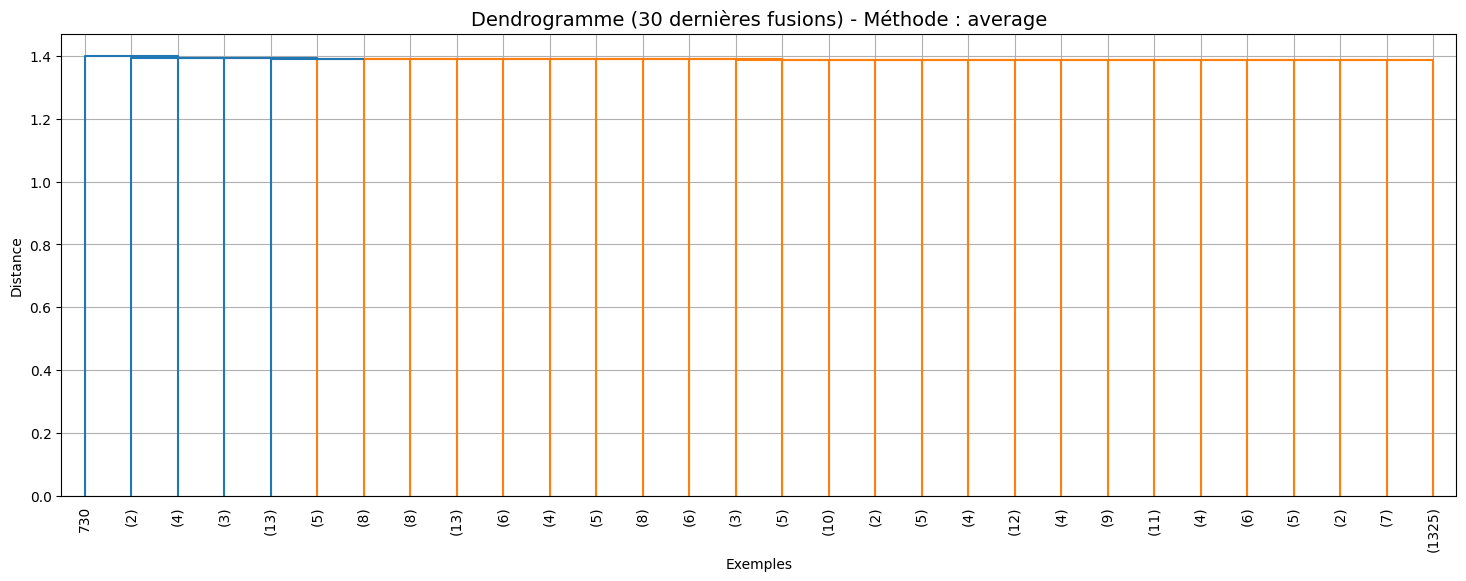

Répartition des clusters : {1: 2, 2: 4, 3: 3, 4: 1490, 5: 1}
Silhouette : 0.010579685322703994
ARI        : -2.7919522216026178e-05
V-measure  : 0.009788906478538167


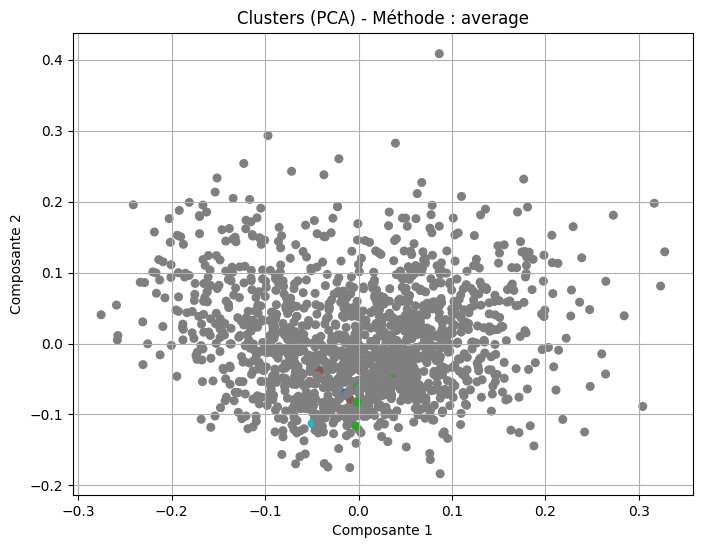

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Clustering hiérarchique avec average
Z_average = linkage(X_norm, method='average')
K = 5  # nombre de clusters

# Étape 2 : Seuil de distance pour color_threshold
color_threshold = Z_average[-K, 2]

# Étape 3 : Dendrogramme tronqué (affiche les 30 dernières fusions)
plt.figure(figsize=(18, 6))
plt.title("Dendrogramme (30 dernières fusions) - Méthode : average", fontsize=14)
dendrogram(
    Z_average,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold=color_threshold
)
plt.xlabel("Exemples")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Étape 4 : Création des clusters
labels_average = fcluster(Z_average, t=K, criterion='maxclust')

# Étape 5 : Évaluation
print("Répartition des clusters :", dict(zip(*np.unique(labels_average, return_counts=True))))
print("Silhouette :", silhouette_score(X_norm, labels_average))
print("ARI        :", adjusted_rand_score(y, labels_average))
print("V-measure  :", v_measure_score(y, labels_average))

# Étape 6 : Visualisation PCA
X_proj = PCA(n_components=2).fit_transform(X_norm)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels_average, cmap='tab10', s=30)
plt.title("Clusters (PCA) - Méthode : average")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()



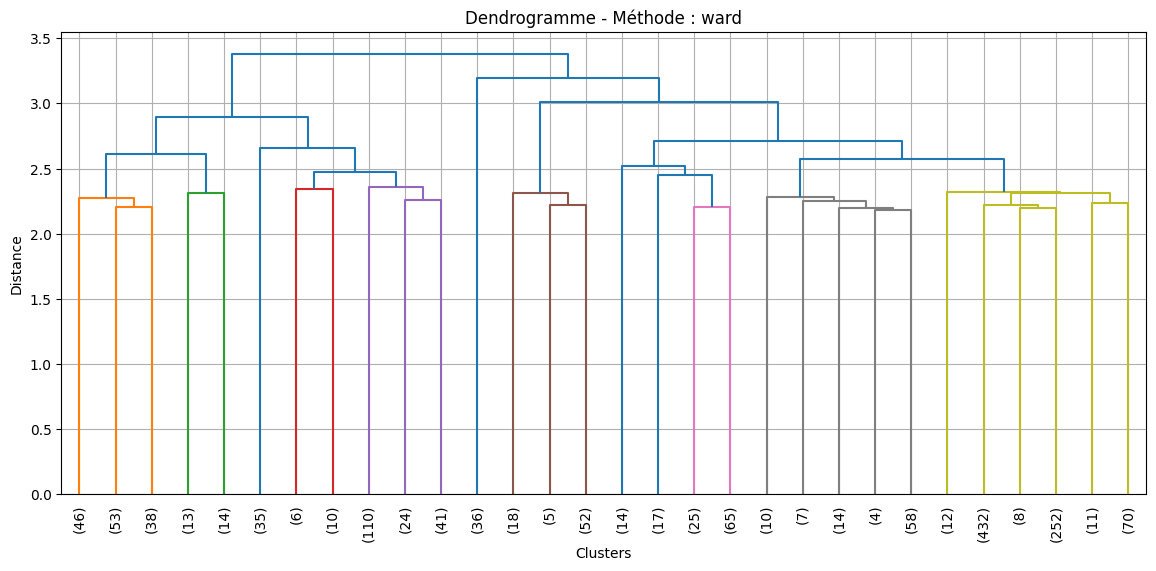

Répartition des clusters : {1: 164, 2: 226, 3: 36, 4: 75, 5: 999}
Silhouette : 0.007822764842058712
ARI        : 0.019300209079090292
V-measure  : 0.15232975096893997


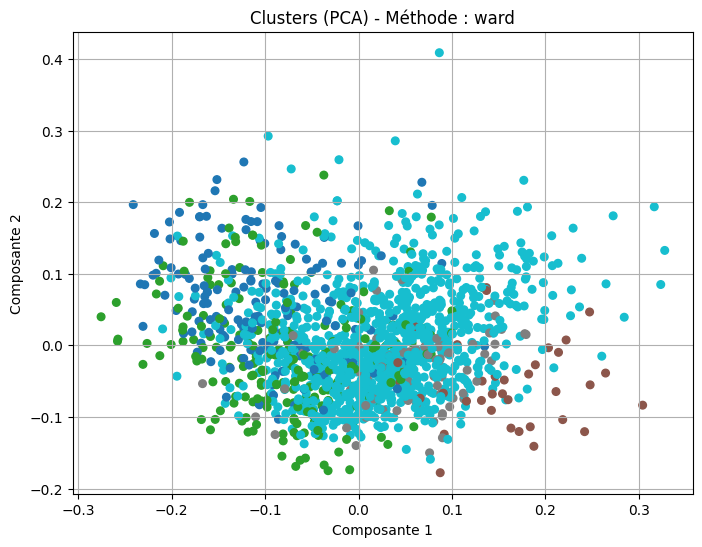

In [15]:
Z_ward = linkage(X_norm, method='ward')

plt.figure(figsize=(14, 6))
plt.title("Dendrogramme - Méthode : ward")
dendrogram(Z_ward, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

labels_ward = fcluster(Z_ward, t=5, criterion='maxclust')
print("Répartition des clusters :", dict(zip(*np.unique(labels_ward, return_counts=True))))
print("Silhouette :", silhouette_score(X_norm, labels_ward))
print("ARI        :", adjusted_rand_score(y, labels_ward))
print("V-measure  :", v_measure_score(y, labels_ward))

X_proj = PCA(n_components=2).fit_transform(X_norm)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels_ward, cmap='tab10', s=30)
plt.title("Clusters (PCA) - Méthode : ward")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()


In [33]:
"""Remarque : Les couleurs présentes dans le dendrogramme représentent les principaux groupes (clusters) formés à partir d’un seuil de distance déterminé (ici, pour K = 5).
Elles permettent de visualiser rapidement la structure globale des regroupements.
Cependant, la couleur attribuée à chaque cluster dans le dendrogramme ne correspond pas nécessairement au numéro du cluster obtenu par fcluster, ni aux couleurs affichées dans la visualisation PCA.
Il s’agit uniquement d’un repérage visuel des branches majeures de l’arbre hiérarchique."""

'Remarque : Les couleurs présentes dans le dendrogramme représentent les principaux groupes (clusters) formés à partir d’un seuil de distance déterminé (ici, pour K = 5).\nElles permettent de visualiser rapidement la structure globale des regroupements.\nCependant, la couleur attribuée à chaque cluster dans le dendrogramme ne correspond pas nécessairement au numéro du cluster obtenu par fcluster, ni aux couleurs affichées dans la visualisation PCA.\nIl s’agit uniquement d’un repérage visuel des branches majeures de l’arbre hiérarchique.'

In [14]:
# Crée un dictionnaire avec les labels déjà calculés
methods_labels = {
    'single': labels_single,
    'complete': labels_complete,
    'average': labels_average,
    'ward': labels_ward
}

# Stocker les résultats dans une liste
results = []

for method, labels in methods_labels.items():
    n_clusters = len(np.unique(labels))
    
    if n_clusters >= 2:
        results.append({
            'Méthode': method,
            'Clusters': n_clusters,
            'Silhouette': silhouette_score(X_norm, labels),
            'ARI': adjusted_rand_score(y, labels),
            'V-measure': v_measure_score(y, labels)
        })
    else:
        results.append({
            'Méthode': method,
            'Clusters': n_clusters,
            'Silhouette': None,
            'ARI': None,
            'V-measure': None
        })

# Convertir en DataFrame pour affichage
df_comparatif_cha = pd.DataFrame(results)
display(df_comparatif_cha)

,Méthode,Clusters,Silhouette,ARI,V-measure
0,single,5,-0.016543,0.000105,0.005651
1,complete,4,-0.012216,0.003395,0.018738
2,average,5,0.010580,-0.000028,0.009789
3,ward,5,0.007823,0.019300,0.152330


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#KMEANS
scores_kmeans = []

# Tester K-means pour différentes valeurs de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_norm)
    
    silhouette = silhouette_score(X_norm, labels_kmeans)
    ari = adjusted_rand_score(y, labels_kmeans)
    
    scores_kmeans.append({
        'k': k,
        'Silhouette': silhouette,
        'ARI': ari,
    })

# Affichage tableau comparatif
df_kmeans = pd.DataFrame(scores_kmeans)
display(df_kmeans)


,k,Silhouette,ARI
0,2,0.006774,0.038009
1,3,0.004977,0.032106
2,4,0.005904,0.040542
3,5,0.004983,0.053513
4,6,0.003263,0.051313
5,7,-0.001797,0.052350
6,8,0.006476,0.055087
7,9,0.000523,0.064124
8,10,0.004788,0.061439


,k,Inertie
0,2,1407.397349
1,3,1401.136554
2,4,1395.434772
3,5,1391.158770
4,6,1388.292720
5,7,1384.243222
6,8,1378.515620
7,9,1375.573842
8,10,1372.034832


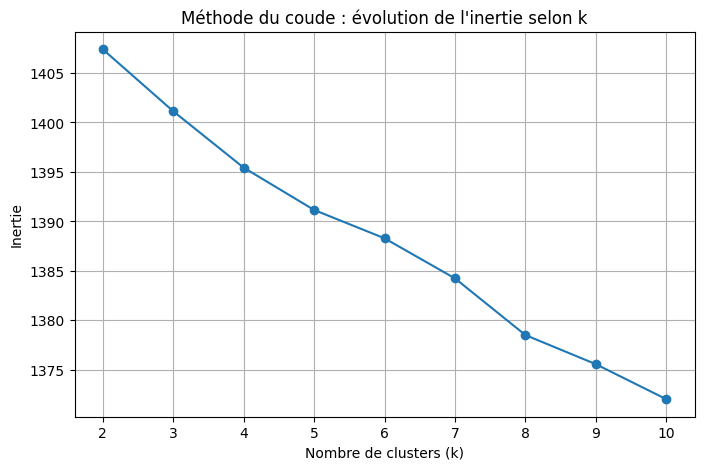

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

inertias = []
ks = list(range(2, 11))

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_norm)
    inertias.append(kmeans.inertia_)

# Création d'un DataFrame pour affichage
df_inertie = pd.DataFrame({
    'k': ks,
    'Inertie': inertias
})

# Affichage du tableau
display(df_inertie)

# Courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(df_inertie['k'], df_inertie['Inertie'], marker='o')
plt.title("Méthode du coude : évolution de l'inertie selon k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


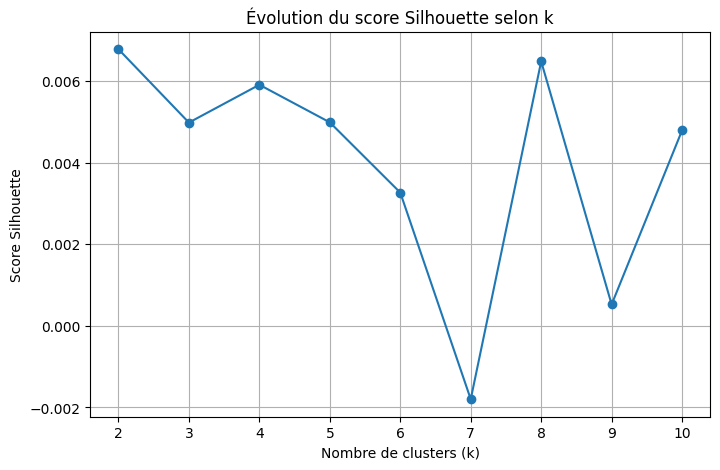

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(df_kmeans['k'], df_kmeans['Silhouette'], marker='o')
plt.title("Évolution du score Silhouette selon k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score Silhouette")
plt.grid(True)
plt.show()

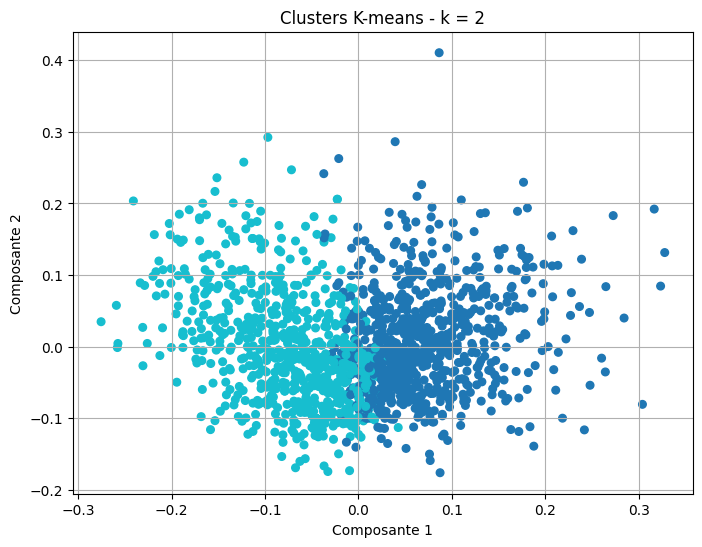

In [36]:
best_k = df_kmeans.loc[df_kmeans['Silhouette'].idxmax(), 'k']
kmeans = KMeans(n_clusters=int(best_k), n_init=10, random_state=42)
labels = kmeans.fit_predict(X_norm)

X_proj = PCA(n_components=2).fit_transform(X_norm)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels, cmap='tab10', s=30)
plt.title(f"Clusters K-means - k = {int(best_k)}")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()


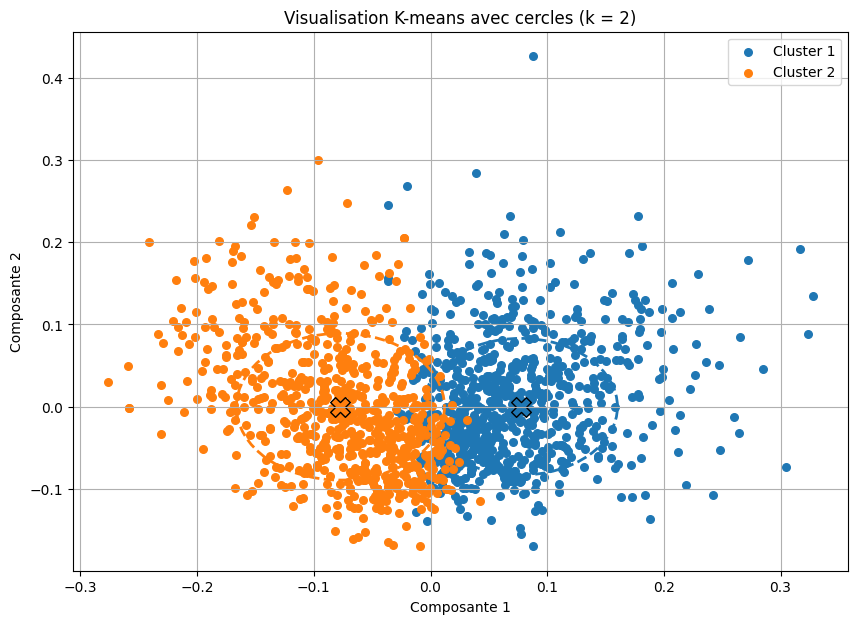

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Fixer k
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_norm)

# Projection PCA
X_proj = PCA(n_components=2).fit_transform(X_norm)
centroids_2D = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Affichage avec cercles
plt.figure(figsize=(10, 7))
colors = plt.cm.tab10(np.arange(k))

for i in range(k):
    cluster_points = X_proj[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[i], label=f'Cluster {i+1}')

    # Calcul du rayon comme la distance moyenne au centroïde
    centroid = centroids_2D[i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    radius = distances.mean()

    # Cercle autour du centroïde
    circle = Circle(centroid, radius, color=colors[i], fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

    # Afficher le centroïde
    plt.scatter(centroid[0], centroid[1], color=colors[i], marker='X', s=200, edgecolor='black')

plt.title(f"Visualisation K-means avec cercles (k = {k})")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#Avec distance cosine
from scipy.spatial.distance import pdist, squareform
D_cos = squareform(pdist(X_norm, metric='cosine'))

In [56]:
#On transforme la colonne "stopword" du dataset en liste et on stocke le resultat dans stopwords_list
stopwords_list = stop_words_df['stopword'].tolist()

# --- Avec stopwords : version complète ---
lesmots_avec_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), [])  # garder tous les mots
    lesmots_avec_stopwords.append(mots)
news_avec_stopwords = newsgroups_df.copy()
news_avec_stopwords['les_mots'] = lesmots_avec_stopwords

# --- Sans stopwords : nettoyage standard ---
lesmots_sans_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), stopwords_list)  # enlever les stopwords
    lesmots_sans_stopwords.append(mots)
news_sans_stopwords = newsgroups_df.copy()
news_sans_stopwords['les_mots'] = lesmots_sans_stopwords


In [57]:
news_avec_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[i, am, sure, some, bashers, of, pens, fans, a..."
1,My brother is in the market for a high-perform...,3,"[my, brother, is, in, the, market, for, a, hig..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, you, said, what, you, dream, about, ..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, it's, the, scsi, card, doing, the, dma..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, i, have, an, old, jasmine, drive, which, i..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, from, nyeda, cnsvax, uwec, edu, david, ny..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[not, in, isolated, ground, recepticles, usual..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[i, just, installed, a, dx2, 66, cpu, in, a, c..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[wouldn't, this, require, a, hyper, sphere, in..."


In [58]:
news_sans_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


In [59]:
df_avec_stopwords, _  =  net.train_test_split(news_avec_stopwords,'target', taux=0.05)
test_avec_stopwords, _ = net.train_test_split(news_avec_stopwords,'target', taux=0.08)
df_avec_stopwords

,messages,target,les_mots
0,"\n\n\n\nOh, do please try not to be ludicrous....",18,"[oh, do, please, try, not, to, be, ludicrous, ..."
1,\nXGA or XGA-2? For the original XGA you just...,3,"[xga, or, xga, 2, for, the, original, xga, you..."
2,"\n\nHST is about 25,500 lbs (11,600 kg). That...",14,"[hst, is, about, 25, 500, lbs, 11, 600, kg, th..."
3,"I don't know about where you are, but here in ...",7,"[i, don't, know, about, where, you, are, but, ..."
4,I have a few the original IBM 10Mb harddisks f...,6,"[i, have, a, few, the, original, ibm, 10mb, ha..."
...,...,...,...
927,\nWhy? There is no need to go into this..........,17,"[why, there, is, no, need, to, go, into, this,..."
928,Why should anyone (check: let's restrict this ...,19,"[why, should, anyone, check, let's, restrict, ..."
929,"JG> After this fall, I believe IBM no longer h...",2,"[jg, after, this, fall, i, believe, ibm, no, l..."
930,Does anybody share my opinion that in big-city...,8,"[does, anybody, share, my, opinion, that, in, ..."


In [60]:
print(test_avec_stopwords.shape)

(1498, 3)


In [61]:
df_sans_stopwords,_ =  net.train_test_split(news_sans_stopwords,'target', taux=0.02)
test_sans_stopwords, _ = net.train_test_split(news_avec_stopwords,'target', taux=0.08)
df_sans_stopwords

,messages,target,les_mots
0,": >: English cars:-\n: >\n: >: Rover, Reliant,...",8,"[english, cars, rover, reliant, morgan, bristo..."
1,\n\n\nI remember reading somewhere (QEMM manua...,3,"[remember, reading, somewhere, qemm, manual, t..."
2,\nThem thar's fighting words...hardly a force....,10,"[thar's, fighting, words, hardly, force, geez,..."
3,NaN,9,[nan]
4,"\nYou may have been emailed this, but the IIsi...",4,"[may, emailed, iisi's, power, supply, rated, h..."
...,...,...,...
358,I have a MacIIFX and I know that it is wired a...,4,"[maciifx, know, wired, scsi, chain, bought, dr..."
359,Here are some ideas for those of you who want ...,11,"[ideas, want, oppose, white, house, clipper, c..."
360,\nDid you forget to put in a sarcasm flag?,16,"[forget, put, sarcasm, flag]"
361,"\nMaybe before Babel,everyone including angels...",15,"[maybe, babel, everyone, including, angels, sp..."


In [62]:
print(np.unique(df_sans_stopwords['target']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


Représentations des données: bag-of-words binaire

In [63]:
textes_train = [' '.join(mots) for mots in df_sans_stopwords['les_mots']]
textes_test = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]
textes_full = [' '.join(mots) for mots in news_sans_stopwords['les_mots']]


In [64]:
# Préparation des labels
y_train = np.array(df_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
y_full = np.array(news_sans_stopwords['target'])

In [65]:
def binarize_labels(y, pos_class):
    return np.array([1 if label == pos_class else -1 for label in y])

In [66]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)
y_full_bin = binarize_labels(y_full, classe_positive)



In [67]:
vect = CountVectorizer(binary=True, max_features=50000)
vect.fit(textes_full)

X_train = vect.transform(textes_train).toarray()
X_test = vect.transform(textes_test).toarray()
X_full = vect.transform(textes_full).toarray()


In [46]:
#On transforme la colonne "stopword" du dataset en liste et on stocke le resultat dans stopwords_list
stopwords_list = stop_words_df['stopword'].tolist()

# --- Avec stopwords : version complète ---
lesmots_avec_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), [])  # garder tous les mots
    lesmots_avec_stopwords.append(mots)
news_avec_stopwords = newsgroups_df.copy()
news_avec_stopwords['les_mots'] = lesmots_avec_stopwords

# --- Sans stopwords : nettoyage standard ---
lesmots_sans_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), stopwords_list)  # enlever les stopwords
    lesmots_sans_stopwords.append(mots)
news_sans_stopwords = newsgroups_df.copy()
news_sans_stopwords['les_mots'] = lesmots_sans_stopwords

In [68]:
train_sans_stopwords, _  =  net.train_test_split(news_sans_stopwords,'target', taux=0.01)
test_sans_stopwords, _ = net.train_test_split(news_sans_stopwords,'target', taux=0.034)
print(train_sans_stopwords.shape) # nb documents - dataset train
print(test_sans_stopwords.shape) # nb documents - dataset test
train_sans_stopwords


(173, 3)
(629, 3)


,messages,target,les_mots
0,"\nThe sensitivity is changed using the /S, /V,...",2,"[sensitivity, changed, using, v, h, parameter,..."
1,NaN,12,[nan]
2,"\n\nIn fact, they make some ,but they just don...",7,"[fact, make, sell, u, sunny, california, 1, 6l..."
3,"\n\nMSG is mono sodium glutamate, a fairly str...",13,"[msg, mono, sodium, glutamate, fairly, straigh..."
4,"I am a newbie to the net, and I am trying to g...",14,"[newbie, net, trying, get, information, paper,..."
...,...,...,...
168,"\n\n\n\n\n\nObviously, we have different sourc...",0,"[obviously, different, sources, bill, moyers, ..."
169,This seems to be a simple problem but I just c...,1,"[seems, simple, problem, cannot, solve, wrote,..."
170,"Hi world,\n \n I want to buy a S...",3,"[hi, world, want, buy, spirit, ii, 14400, data..."
171,\n\n\nWouldn't you rather have some type of st...,7,"[rather, type, standard, electrical, plug, ins..."


In [69]:
train_sans_stopwords[train_sans_stopwords['target']==3] # une classe utilise pour la classification binaire

,messages,target,les_mots
7,\n\n\n,3,[]
15,[stuff deleted]\n\n Not only do you lose Accu...,3,"[stuff, deleted, lose, accucolor, also, give, ..."
28,I posted almost the same bad experience with ...,3,"[posted, almost, bad, experience, midwest, mic..."
32,"Due to some problems with my IDE drive, I LL f...",3,"[due, problems, ide, drive, formatted, maxitor..."
60,"Hi,\n\nI just disassembled my old XT and get 2...",3,"[hi, disassembled, old, xt, get, 2, disk, driv..."
71,NaN,3,[nan]
131,Hello\n\nI have recently suffered from various...,3,"[hello, recently, suffered, various, problems,..."
135,I want to have some info about Diamond Stealth...,3,"[want, info, diamond, stealth, pro, 2, mb, vra..."
170,"Hi world,\n \n I want to buy a S...",3,"[hi, world, want, buy, spirit, ii, 14400, data..."


In [70]:
train_sans_stopwords[train_sans_stopwords['target']==11] # une classe utilise pour la classification binaire

,messages,target,les_mots
17,.................................................,11,"[crypto, '93, conference, announcement, final,..."
24,I am aware of the restrictions imposed b...,11,"[aware, restrictions, imposed, munitions, act,..."
38,Here are some ideas for those of you who want ...,11,"[ideas, want, oppose, white, house, clipper, c..."
109,"\n > OK, I should have read the thread before...",11,"[ok, read, thread, posting, 0, 02, would, add,..."
132,: >:\tI'd really like to see such a thing deve...,11,"[really, like, see, thing, developed, interact..."
142,"<: \n<: As a private citizen, I would feel muc...",11,"[private, citizen, would, feel, much, secure, ..."
146,<>In this giant bally-ho over this Clipper chi...,11,"[giant, bally, ho, clipper, chip, noticed, rat..."
150,>in the field who might be able to find out h...,11,"[field, might, able, find, yet, done, review, ..."
156,\nThe same could be said for many other goverm...,11,"[could, said, many, goverment, agencies, big, ..."


In [83]:
textes_train = [' '.join(mots) for mots in train_sans_stopwords['les_mots']]
textes_test = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]

y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])

def binarize_labels(y, pos_class):
    return np.array([1 if label == pos_class else -1 for label in y])

vect= CountVectorizer(binary=False, max_features=50_000)  


X_train = vect.fit_transform(textes_train).toarray()
X_test = vect.transform(textes_test).toarray()

Naive Bayes Classifier - multiclass

Entraînement...
Temps d'entraînement : 0.0038 secondes
Évaluation...
Accuracy : 0.2496
Temps d'évaluation : 1.3394 secondes


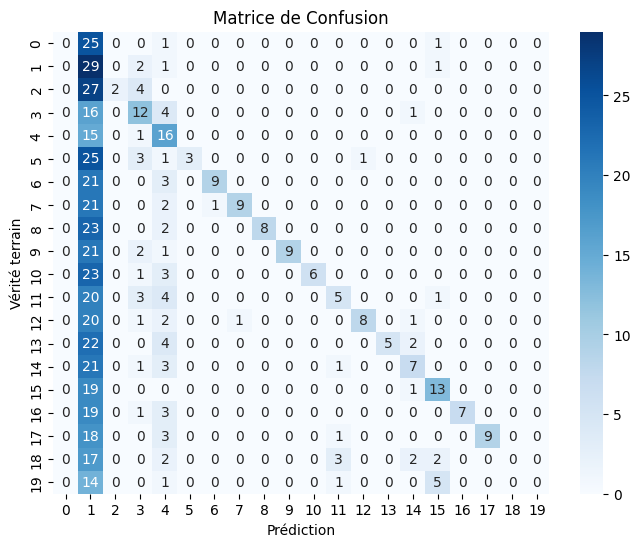


Validation croisée :
  Fold 1: 0.1280
  Fold 2: 0.1040
  Fold 3: 0.0480
  Fold 4: 0.0720
  Fold 5: 0.0465

Moyenne des performances : 0.0797
Écart-type : 0.0319

Matrice de confusion cumulée sur tous les folds :


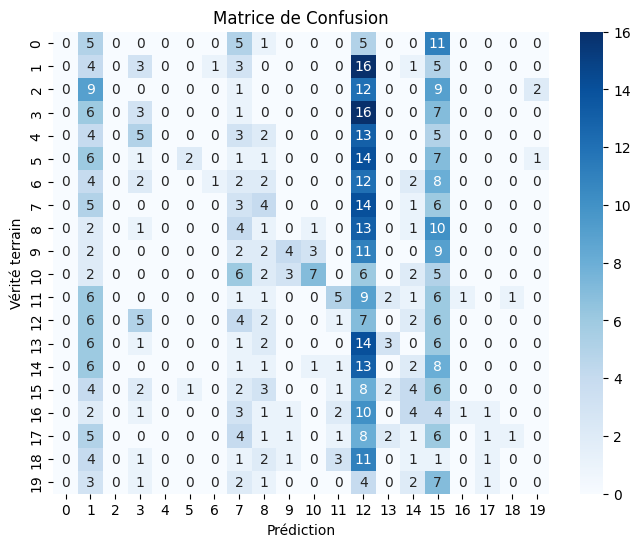

([0.128, 0.104, 0.048, 0.072, 0.046511627906976744],
 0.07970232558139534,
 0.03190306573087709)

In [79]:
input_dim = X_train.shape[1]
bn = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn, X_train, y_train, X_test, y_test, afficher_cm=True)
ev.crossval(bn,X_test,y_test,5)

Naive Bayes Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0058 secondes
Évaluation...
Accuracy : 0.9380
Temps d'évaluation : 0.1430 secondes


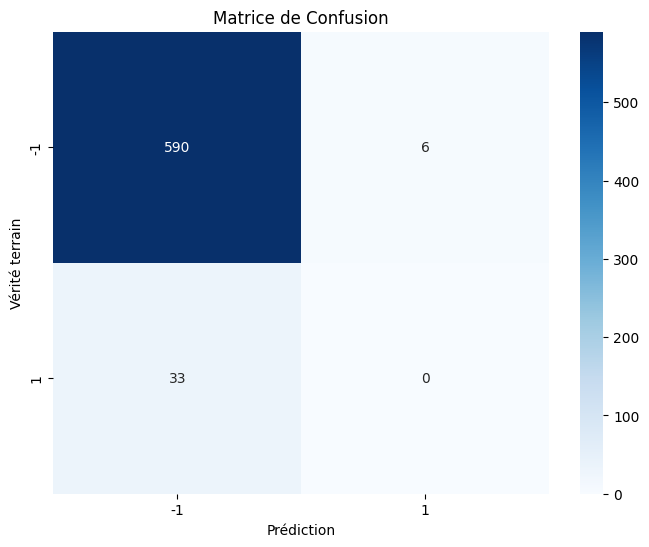


Validation croisée :
  Fold 1: 0.9520
  Fold 2: 0.8880
  Fold 3: 0.9360
  Fold 4: 0.9280
  Fold 5: 0.9302

Moyenne des performances : 0.9268
Écart-type : 0.0212

Matrice de confusion cumulée sur tous les folds :


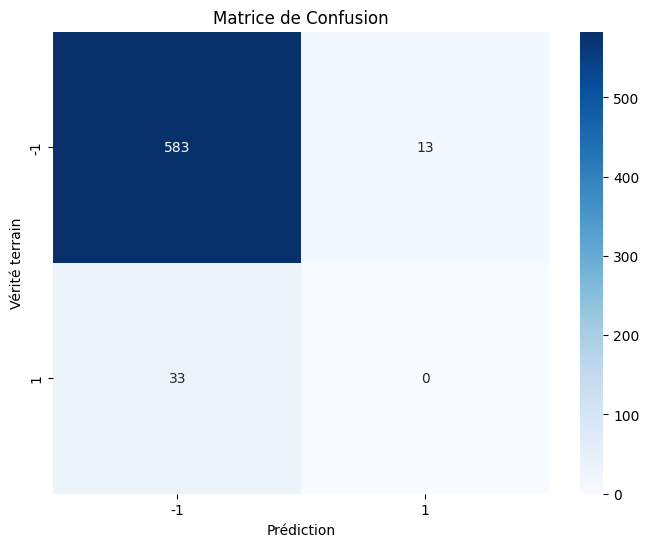

([0.952, 0.888, 0.936, 0.928, 0.9302325581395349],
 0.9268465116279069,
 0.021158126754151144)

In [84]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

bn_bin = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn_bin, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)
ev.crossval(bn_bin,X_test,y_test_bin,5)

KNN Classifier - classification binaire - classe 3 vs les autres - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.3688
Temps d'évaluation : 14.6770 secondes


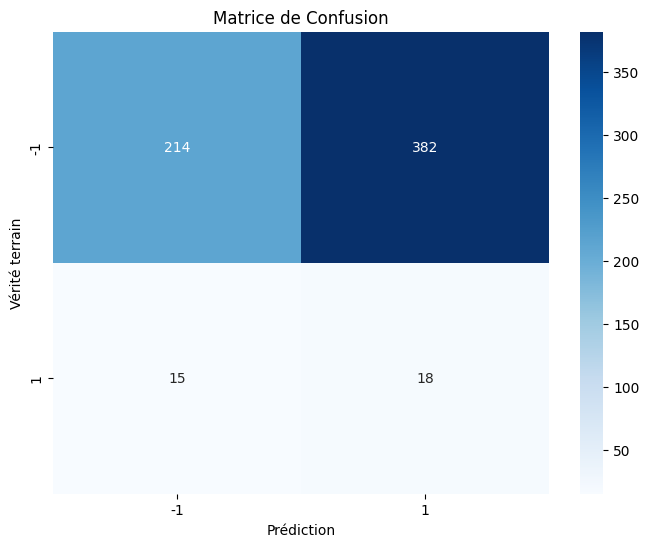

(0.3688394276629571, 1.430511474609375e-06, 14.677018165588379)

In [65]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]
k = 3
knn = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)


Validation croisée :
  Fold 1: 0.9426
  Fold 2: 0.9522
  Fold 3: 0.9479

Moyenne des performances : 0.9475
Écart-type : 0.0039

Matrice de confusion cumulée sur tous les folds :


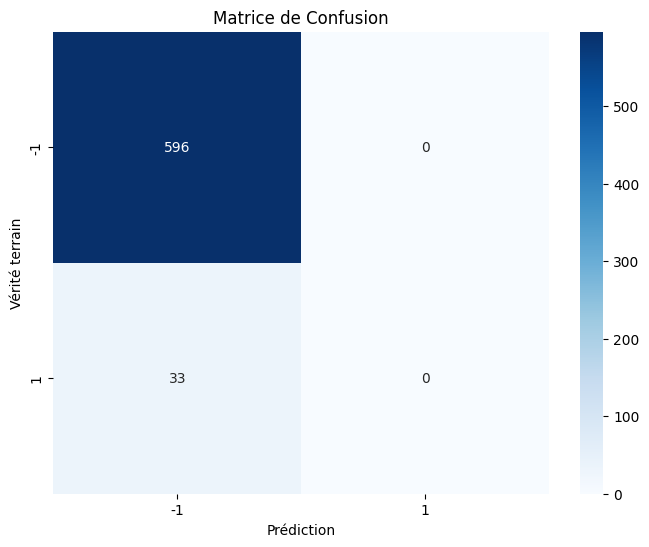

([0.9425837320574163, 0.9521531100478469, 0.9478672985781991],
 0.9475347135611542,
 0.003913754239951399)

In [67]:
ev.crossval(knn,X_test,y_test_bin,3)

KNN Classifier - classification binaire - classe 3 vs les autres - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.8140
Temps d'évaluation : 14.3060 secondes


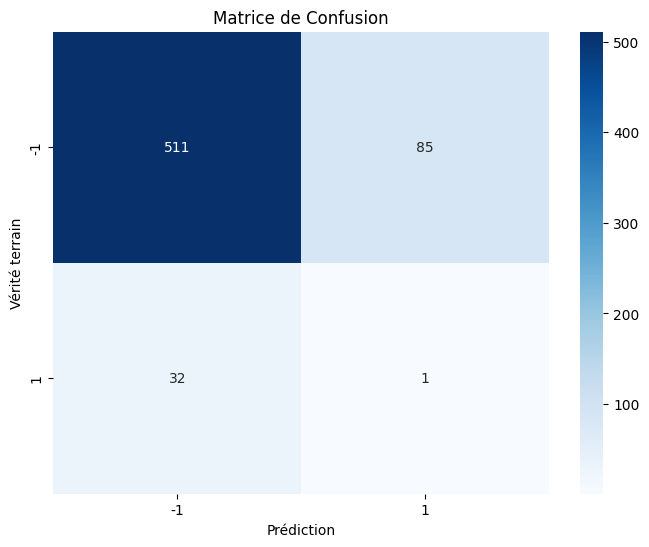

(0.8139904610492846, 1.6689300537109375e-06, 14.305953979492188)

In [66]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]
k = 5
knn2 = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)


Validation croisée :
  Fold 1: 0.9522
  Fold 2: 0.9474
  Fold 3: 0.9431

Moyenne des performances : 0.9475
Écart-type : 0.0037

Matrice de confusion cumulée sur tous les folds :


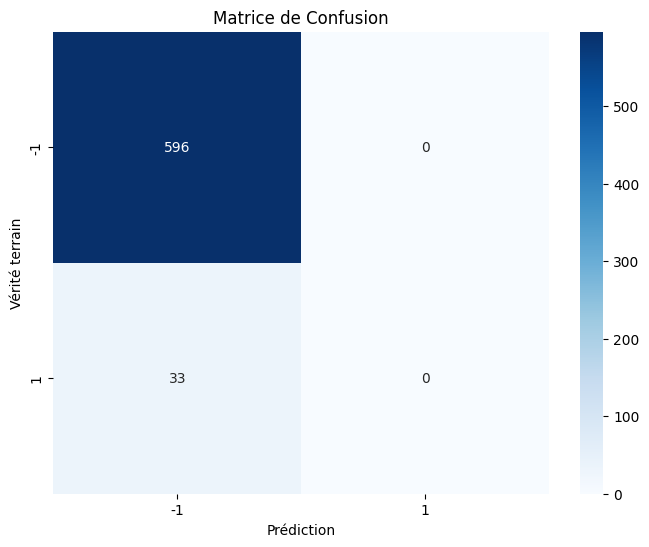

([0.9521531100478469, 0.9473684210526315, 0.943127962085308],
 0.9475498310619287,
 0.0036867335253161133)

In [68]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)
ev.crossval(knn2,X_test,y_test_bin,3)

KNN Cosinus Classifier - classification binaire - classe 3 vs les autres - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9459
Temps d'évaluation : 19.2451 secondes


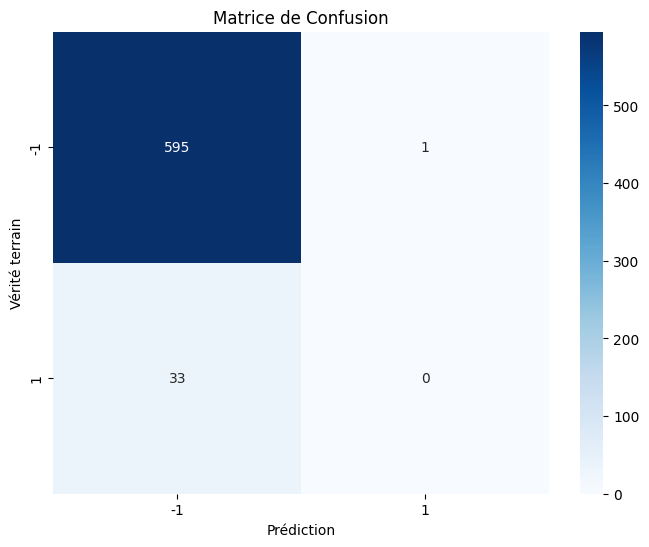


Validation croisée :
  Fold 1: 0.9474
  Fold 2: 0.9330
  Fold 3: 0.9336

Moyenne des performances : 0.9380
Écart-type : 0.0066

Matrice de confusion cumulée sur tous les folds :


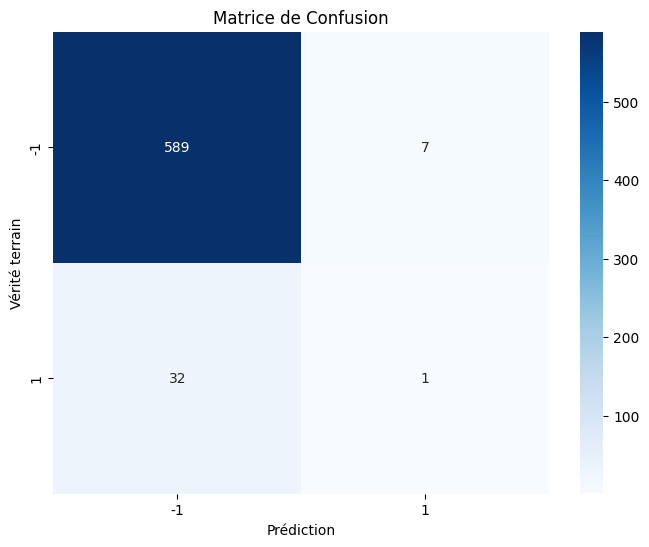

([0.9473684210526315, 0.9330143540669856, 0.933649289099526],
 0.9380106880730477,
 0.006621991669771232)

In [70]:
classe_positive = 3
input_dim = X_train.shape[1]
k = 5
knn_cos = classif.ClassifierKNNCosine(input_dim, k)

ev.evaluer_classifieur(knn_cos, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(knn_cos,X_test,y_test_bin,3)

KNN Classifier - multiclasse - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.0429
Temps d'évaluation : 14.7918 secondes


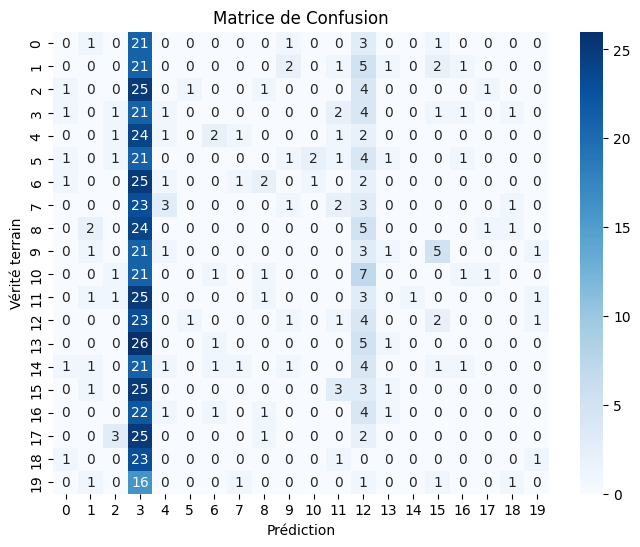


Validation croisée :
  Fold 1: 0.0766
  Fold 2: 0.0431
  Fold 3: 0.0995

Moyenne des performances : 0.0730
Écart-type : 0.0232

Matrice de confusion cumulée sur tous les folds :


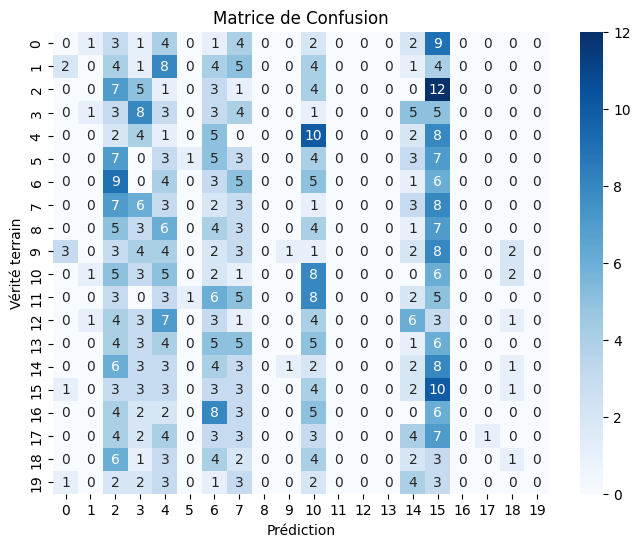

([0.07655502392344497, 0.0430622009569378, 0.0995260663507109],
 0.07304776374369788,
 0.023184300424753838)

In [74]:
y_train = np.array(df_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 3
knn_mult = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult,X_test,y_test,3)

KNN Classifier - multiclasse - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.0541
Temps d'évaluation : 14.6164 secondes


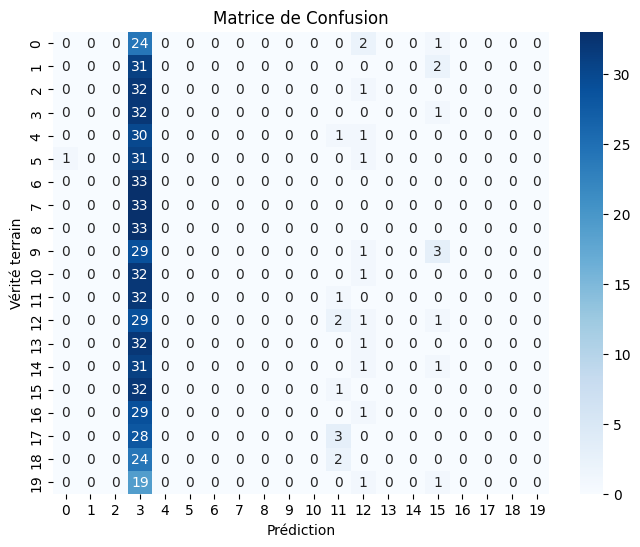


Validation croisée :
  Fold 1: 0.0718
  Fold 2: 0.0622
  Fold 3: 0.0521

Moyenne des performances : 0.0620
Écart-type : 0.0080

Matrice de confusion cumulée sur tous les folds :


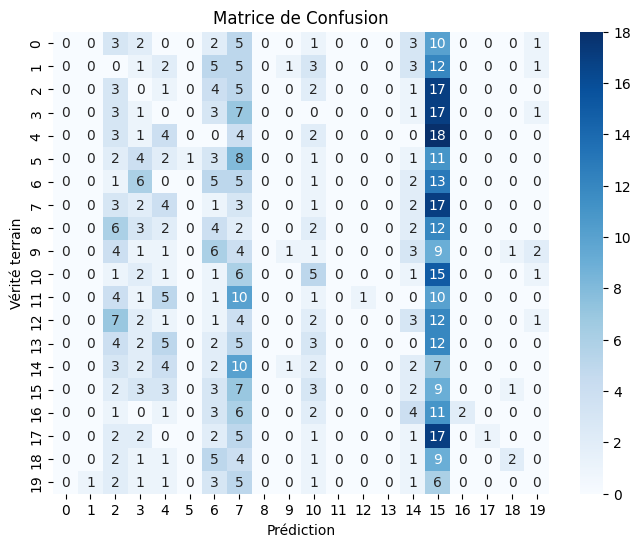

([0.07177033492822966, 0.06220095693779904, 0.052132701421800945],
 0.062034664429276555,
 0.008017892588122143)

In [75]:
y_train = np.array(df_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 5
knn_mult2 = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult2, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult2,X_test,y_test,3)

Perceptron Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0571 secondes
Évaluation...
Accuracy : 0.8394
Temps d'évaluation : 0.0506 secondes


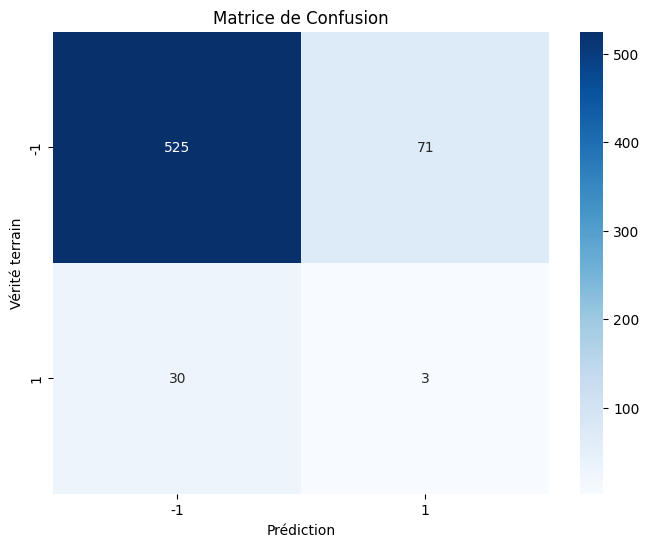


Validation croisée :
  Fold 1: 0.8880
  Fold 2: 0.8800
  Fold 3: 0.8800
  Fold 4: 0.9200
  Fold 5: 0.8992

Moyenne des performances : 0.8934
Écart-type : 0.0150

Matrice de confusion cumulée sur tous les folds :


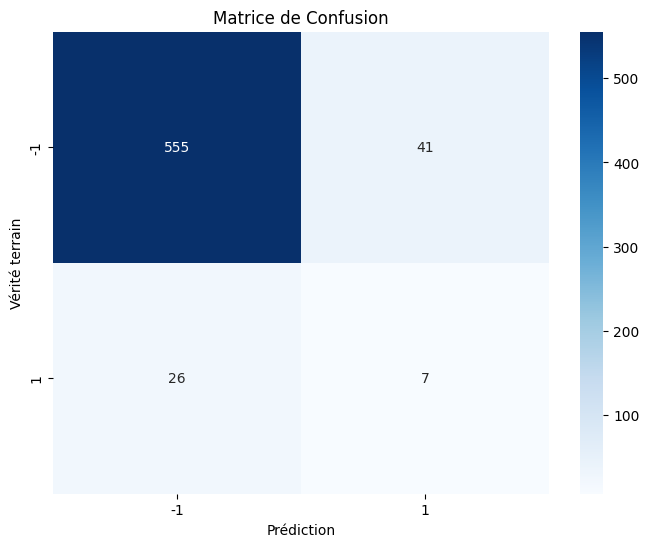

([0.888, 0.88, 0.88, 0.92, 0.8992248062015504],
 0.8934449612403101,
 0.015031688259939209)

In [78]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron1 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron1, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron1,X_test,y_test_bin,5)

Entraînement...
Temps d'entraînement : 0.0938 secondes
Évaluation...
Accuracy : 0.8919
Temps d'évaluation : 0.0887 secondes


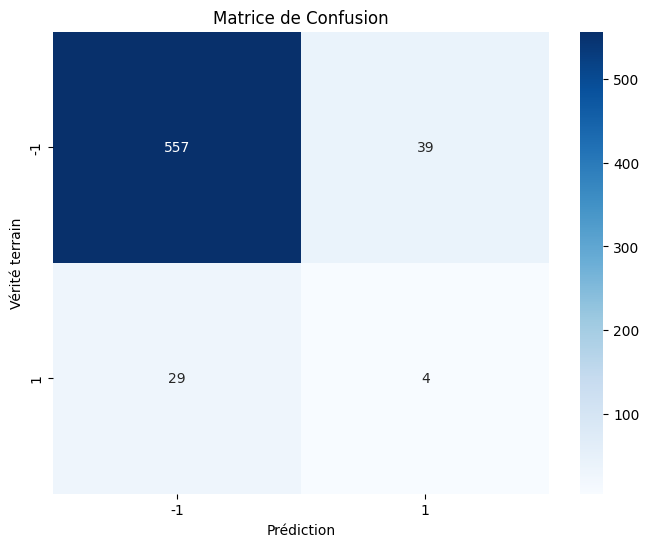


Validation croisée :
  Fold 1: 0.8240
  Fold 2: 0.8800
  Fold 3: 0.9040
  Fold 4: 0.8880
  Fold 5: 0.8915

Moyenne des performances : 0.8775
Écart-type : 0.0278

Matrice de confusion cumulée sur tous les folds :


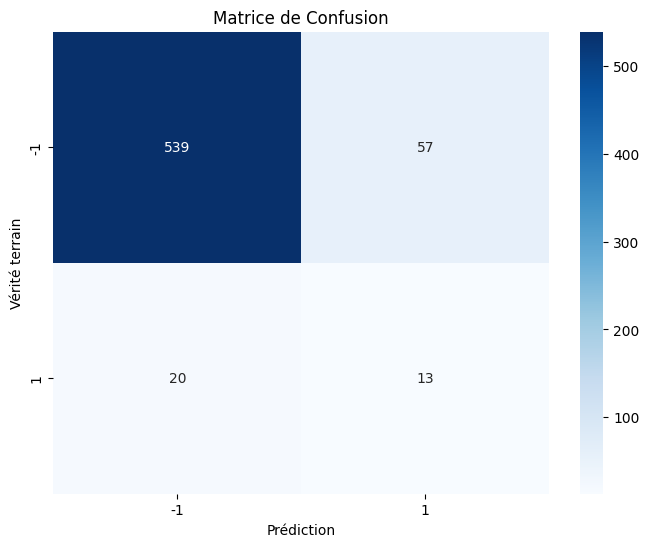

([0.824, 0.88, 0.904, 0.888, 0.8914728682170543],
 0.8774945736434109,
 0.027843278898091163)

In [79]:
classe_positive = 11
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron2 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron2,X_test,y_test_bin,5)

In [51]:



input_dim = X_train.shape[1]
y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



# Initialiser classifieur
arbre_1 = classif.ClassifierArbreDecision(input_dim, epsilon=0.01)


y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])


ev.evaluer_classifieur(arbre_1, X_train, y_train, X_test, y_train, afficher_cm=True)

ev.crossval(arbre_1,X_test,y_test,3)

# Construction de la représentation graphique (affichage)
graphe_arbre_1 = gv.Digraph(format='png')

# Dessin de l'arbre dans le graphe
arbre_1.draw(graphe_arbre_1)

(173, 12750) (173,)
(629, 12750) (629,)
Entraînement...


KeyboardInterrupt: 

Représentations des données: bag-of-words avec comptage

In [85]:
def binarize_labels(y, pos_class):
    return np.array([1 if label == pos_class else -1 for label in y])

train_sans_stopwords, _  =  net.train_test_split(news_sans_stopwords,'target', taux=0.01)
test_sans_stopwords, _ = net.train_test_split(news_sans_stopwords,'target', taux=0.034)
print(train_sans_stopwords.shape)
print(test_sans_stopwords.shape)
train_sans_stopwords

textes_train = [' '.join(mots) for mots in train_sans_stopwords['les_mots']]
textes_test = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]

vect1= CountVectorizer(binary=False, max_features=50_000)  


X_train = vect1.fit_transform(textes_train).toarray()
X_test = vect1.transform(textes_test).toarray()

print(X_train.shape)  # (nombre de documents, nombre de mots retenus)
print(X_test.shape)  # (nombre de documents, nombre de mots retenus)


y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])

(173, 3)
(629, 3)
(173, 12750)
(629, 12750)


Naive Bayes Classifier - multiclass

Entraînement...
Temps d'entraînement : 0.0035 secondes
Évaluation...
Accuracy : 0.2496
Temps d'évaluation : 1.3630 secondes


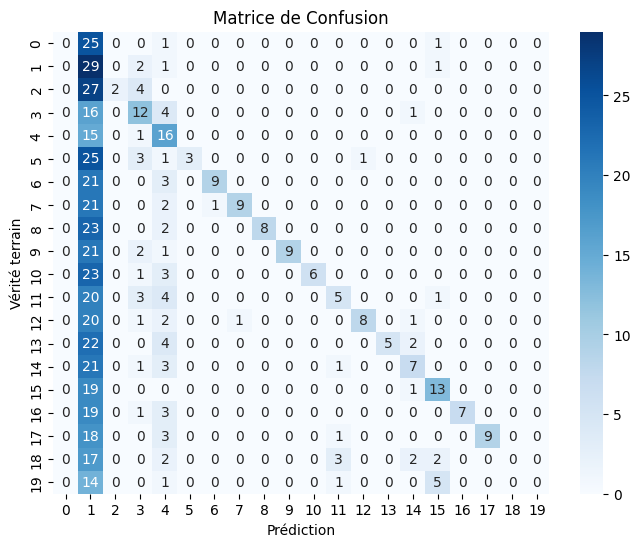


Validation croisée :
  Fold 1: 0.1040
  Fold 2: 0.0960
  Fold 3: 0.1360
  Fold 4: 0.1040
  Fold 5: 0.0853

Moyenne des performances : 0.1051
Écart-type : 0.0169

Matrice de confusion cumulée sur tous les folds :


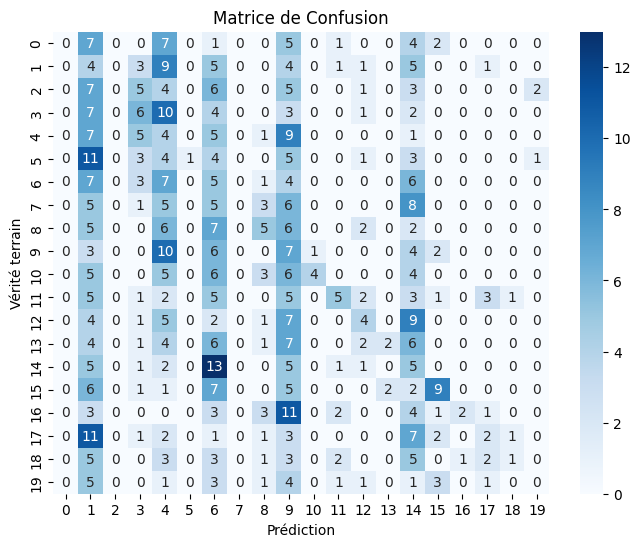

([0.104, 0.096, 0.136, 0.104, 0.08527131782945736],
 0.10505426356589147,
 0.016930482435615183)

In [82]:
input_dim = X_train.shape[1]
bn = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn, X_train, y_train, X_test, y_test, afficher_cm=True)
ev.crossval(bn,X_test,y_test,5)

Naive Bayes Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0038 secondes
Évaluation...
Accuracy : 0.9380
Temps d'évaluation : 0.1380 secondes


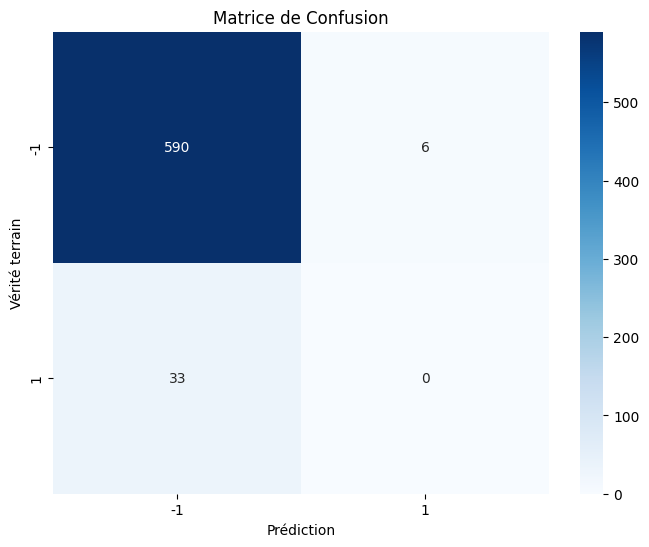


Validation croisée :
  Fold 1: 0.9120
  Fold 2: 0.9600
  Fold 3: 0.9440
  Fold 4: 0.9360
  Fold 5: 0.8992

Moyenne des performances : 0.9302
Écart-type : 0.0219

Matrice de confusion cumulée sur tous les folds :


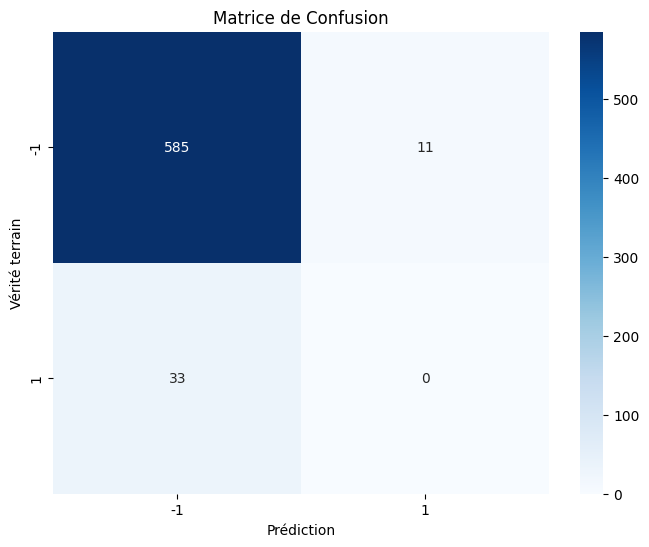

([0.912, 0.96, 0.944, 0.936, 0.8992248062015504],
 0.93024496124031,
 0.021921735895160555)

In [86]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

bn_bin = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn_bin, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)
ev.crossval(bn_bin,X_test,y_test_bin,5)

KNN Classifier - classification binaire - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9507
Temps d'évaluation : 5.8371 secondes


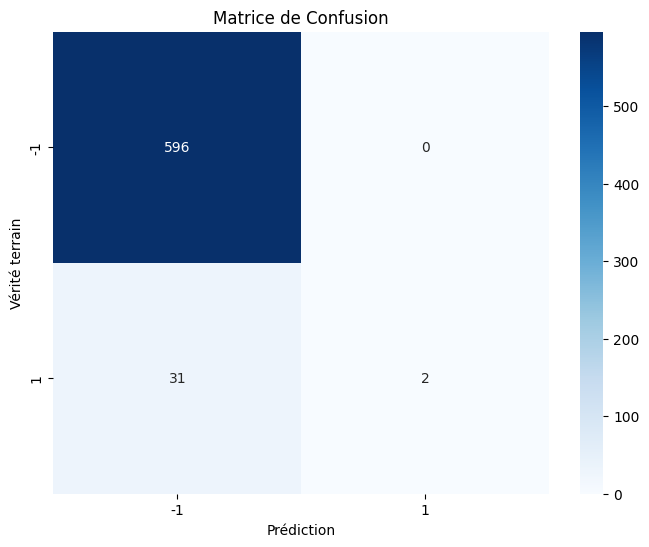


Validation croisée :
  Fold 1: 0.9426
  Fold 2: 0.9522
  Fold 3: 0.9479

Moyenne des performances : 0.9475
Écart-type : 0.0039

Matrice de confusion cumulée sur tous les folds :


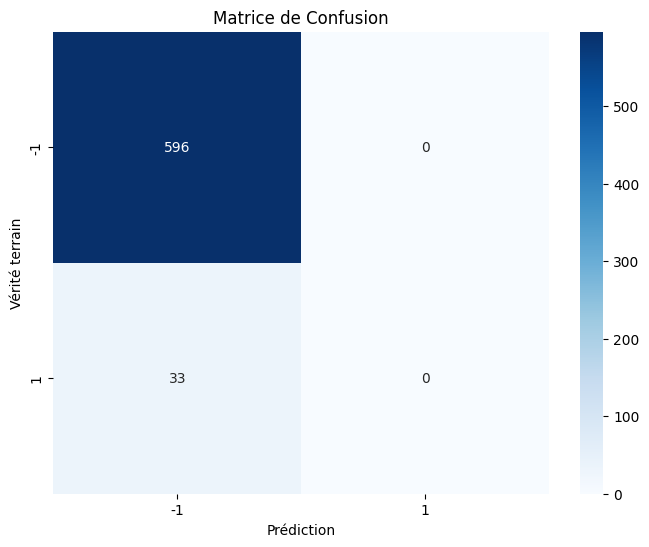

([0.9425837320574163, 0.9521531100478469, 0.9478672985781991],
 0.9475347135611542,
 0.003913754239951399)

In [21]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)



input_dim = X_train.shape[1]
k = 3
knn = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(knn,X_test,y_test_bin,3)

KNN Classifier - classification binaire - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9475
Temps d'évaluation : 5.8937 secondes


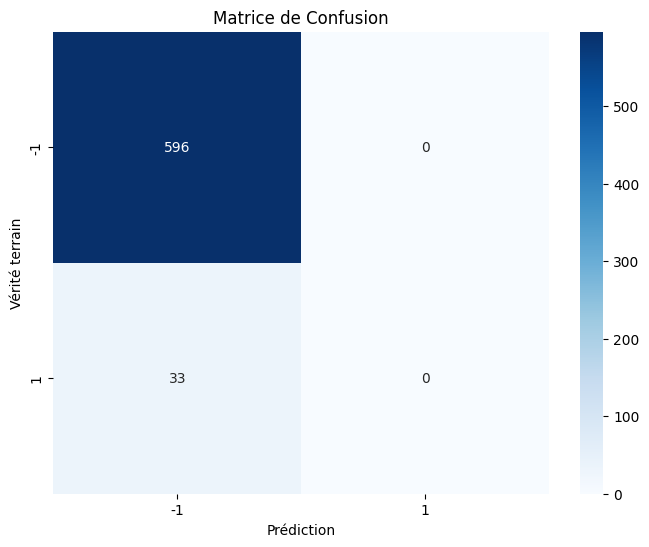


Validation croisée :
  Fold 1: 0.9522
  Fold 2: 0.9474
  Fold 3: 0.9431

Moyenne des performances : 0.9475
Écart-type : 0.0037

Matrice de confusion cumulée sur tous les folds :


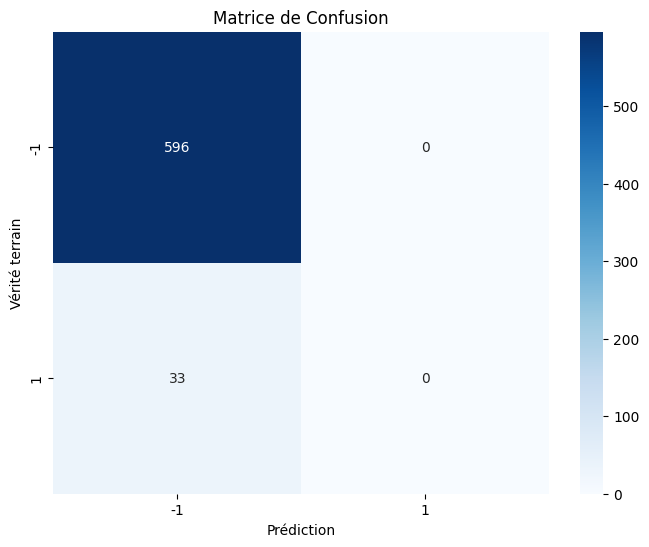

([0.9521531100478469, 0.9473684210526315, 0.943127962085308],
 0.9475498310619287,
 0.0036867335253161133)

In [24]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]
k = 5
knn2 = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)
ev.crossval(knn2,X_test,y_test_bin,3)

KNN Cosinus Classifier - classification binaire - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9507
Temps d'évaluation : 5.8357 secondes


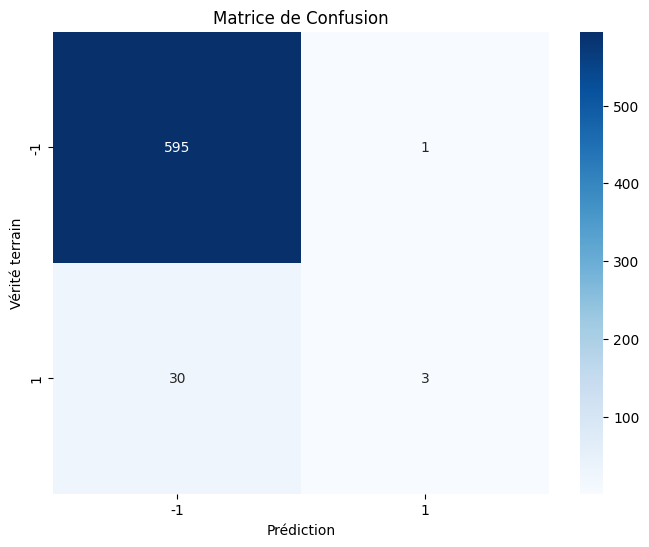


Validation croisée :
  Fold 1: 0.9617
  Fold 2: 0.9378
  Fold 3: 0.9479

Moyenne des performances : 0.9491
Écart-type : 0.0098

Matrice de confusion cumulée sur tous les folds :


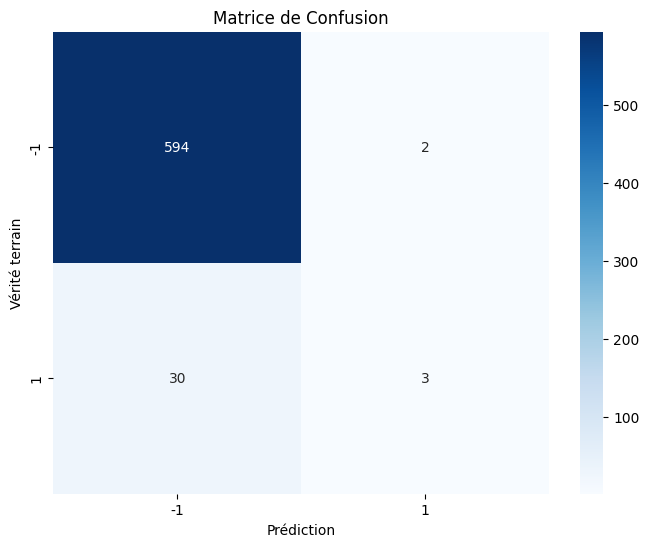

([0.9617224880382775, 0.937799043062201, 0.9478672985781991],
 0.9491296098928924,
 0.00980740799165757)

In [25]:
classe_positive = 3
input_dim = X_train.shape[1]
k = 5
knn_cos = classif.ClassifierKNNCosine(input_dim, k)

ev.evaluer_classifieur(knn_cos, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(knn_cos,X_test,y_test_bin,3)

KNN Classifier - multiclass - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.3132
Temps d'évaluation : 5.4101 secondes


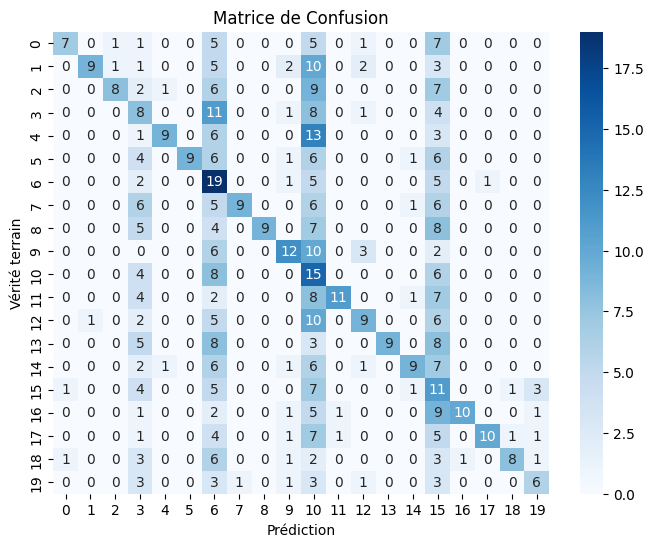


Validation croisée :
  Fold 1: 0.1005
  Fold 2: 0.0718
  Fold 3: 0.0758

Moyenne des performances : 0.0827
Écart-type : 0.0127

Matrice de confusion cumulée sur tous les folds :


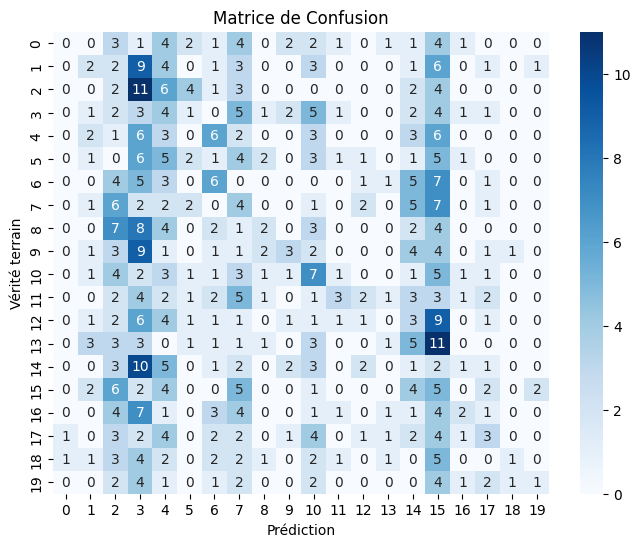

([0.10047846889952153, 0.07177033492822966, 0.07582938388625593],
 0.08269272923800237,
 0.012685119132049045)

In [27]:
y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 3
knn_mult = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult,X_test,y_test,3)

KNN Classifier - multiclass - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.3148
Temps d'évaluation : 5.4815 secondes


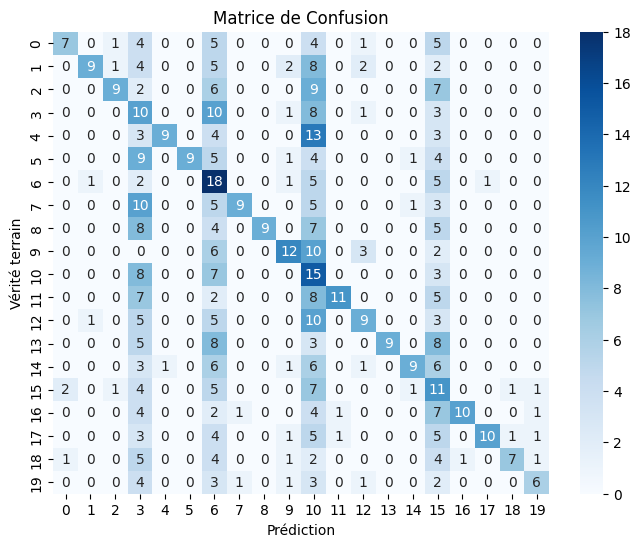


Validation croisée :
  Fold 1: 0.0766
  Fold 2: 0.0861
  Fold 3: 0.1185

Moyenne des performances : 0.0937
Écart-type : 0.0179

Matrice de confusion cumulée sur tous les folds :


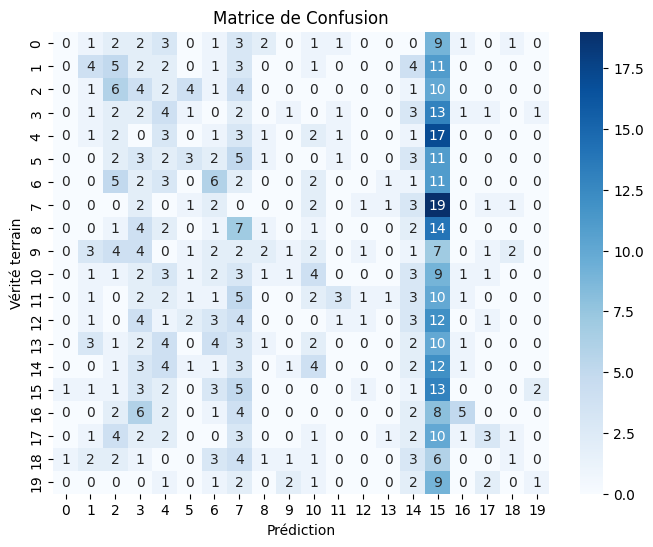

([0.07655502392344497, 0.0861244019138756, 0.11848341232227488],
 0.09372094605319849,
 0.017940235051903015)

In [28]:
y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 5
knn_mult2 = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult2, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult2,X_test,y_test,3)

Perceptron Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0173 secondes
Évaluation...
Accuracy : 0.9141
Temps d'évaluation : 0.0172 secondes


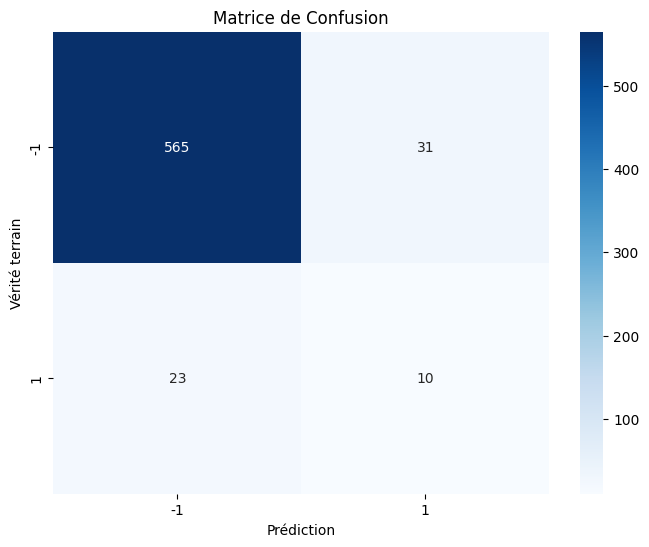


Validation croisée :
  Fold 1: 0.9200
  Fold 2: 0.8960
  Fold 3: 0.9200
  Fold 4: 0.8880
  Fold 5: 0.9070

Moyenne des performances : 0.9062
Écart-type : 0.0128

Matrice de confusion cumulée sur tous les folds :


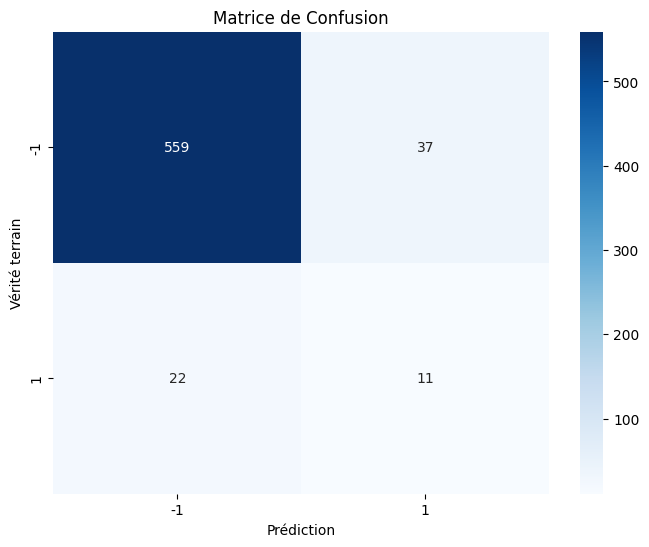

([0.92, 0.896, 0.92, 0.888, 0.9069767441860465],
 0.9061953488372094,
 0.01278094850442628)

In [38]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron1 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron1, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron1,X_test,y_test_bin,5)

Entraînement...
Temps d'entraînement : 0.0282 secondes
Évaluation...
Accuracy : 0.8712
Temps d'évaluation : 0.0163 secondes


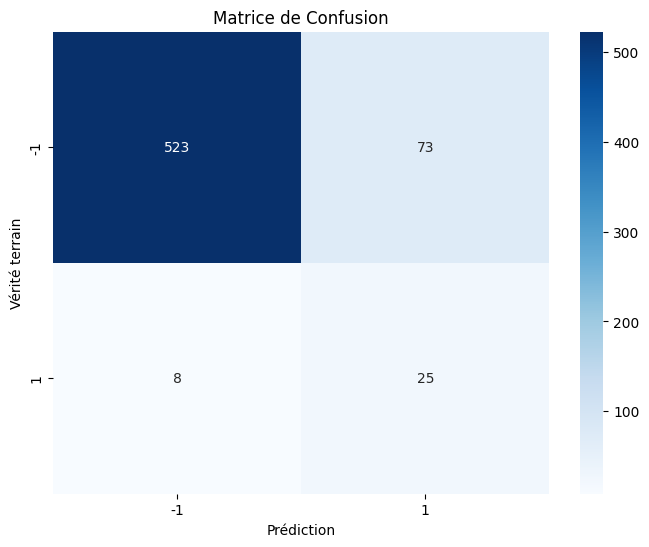


Validation croisée :
  Fold 1: 0.8400
  Fold 2: 0.9040
  Fold 3: 0.9440
  Fold 4: 0.8640
  Fold 5: 0.8915

Moyenne des performances : 0.8887
Écart-type : 0.0354

Matrice de confusion cumulée sur tous les folds :


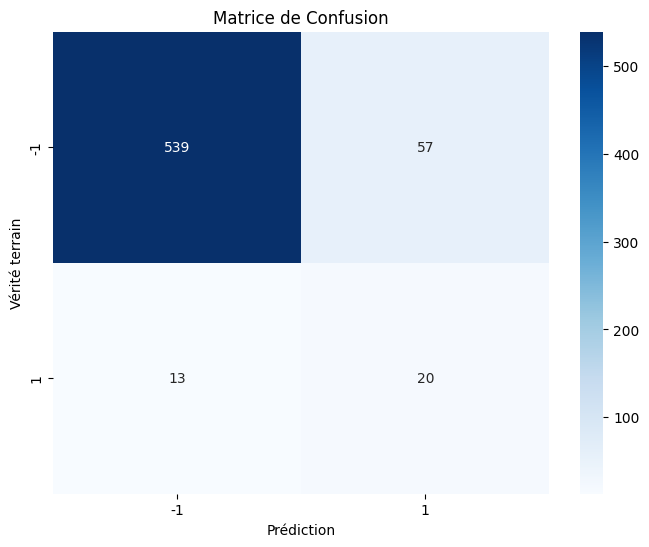

([0.84, 0.904, 0.944, 0.864, 0.8914728682170543],
 0.8886945736434108,
 0.03544474192577065)

In [39]:
classe_positive = 11
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron2 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron2,X_test,y_test_bin,5)

Représentations des données: bag-of-words avec tf-idf

In [87]:
#tf-idf



def binarize_labels(y, pos_class):
    return np.array([1 if label == pos_class else -1 for label in y])

train_sans_stopwords, _  =  net.train_test_split(news_sans_stopwords,'target', taux=0.01)
test_sans_stopwords, _ = net.train_test_split(news_sans_stopwords,'target', taux=0.034)
print(train_sans_stopwords.shape)
print(test_sans_stopwords.shape)


textes_train = [' '.join(mots) for mots in train_sans_stopwords['les_mots']]
textes_test = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]

vect_sans_tfidf = TfidfVectorizer(max_features=50_000)

X_train = vect_sans_tfidf.fit_transform(textes_train).toarray()
X_test = vect_sans_tfidf.transform(textes_test).toarray()

print(X_train.shape)  # (nombre de documents, nombre de mots retenus)
print(X_test.shape)  # (nombre de documents, nombre de mots retenus)


y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])

(173, 3)
(629, 3)
(173, 12750)
(629, 12750)


Naive Bayes Classifier - multiclass

Entraînement...
Temps d'entraînement : 0.0059 secondes
Évaluation...
Accuracy : 0.0525
Temps d'évaluation : 1.2264 secondes


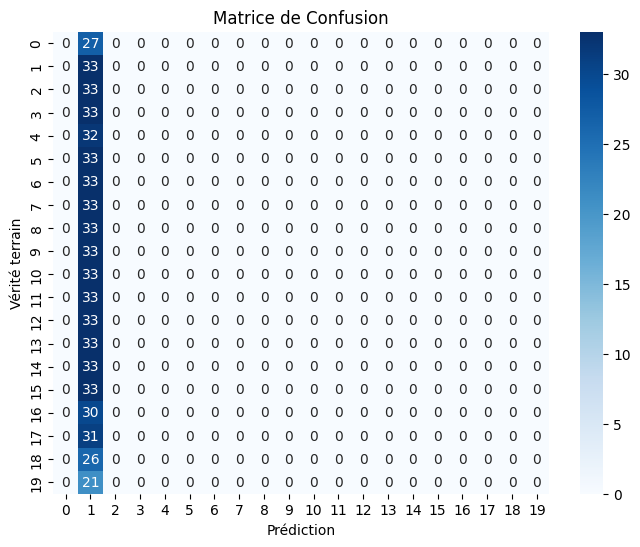


Validation croisée :
  Fold 1: 0.0320
  Fold 2: 0.0240
  Fold 3: 0.0480
  Fold 4: 0.0240
  Fold 5: 0.0310

Moyenne des performances : 0.0318
Écart-type : 0.0088

Matrice de confusion cumulée sur tous les folds :


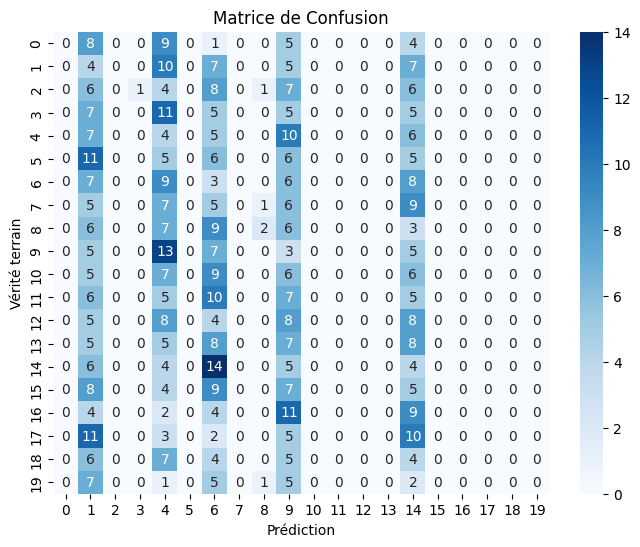

([0.032, 0.024, 0.048, 0.024, 0.031007751937984496],
 0.0318015503875969,
 0.008772544043471754)

In [88]:
input_dim = X_train.shape[1]
bn = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn, X_train, y_train, X_test, y_test, afficher_cm=True)
ev.crossval(bn,X_test,y_test,5)

Naive Bayes Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0063 secondes
Évaluation...
Accuracy : 0.9475
Temps d'évaluation : 0.1343 secondes


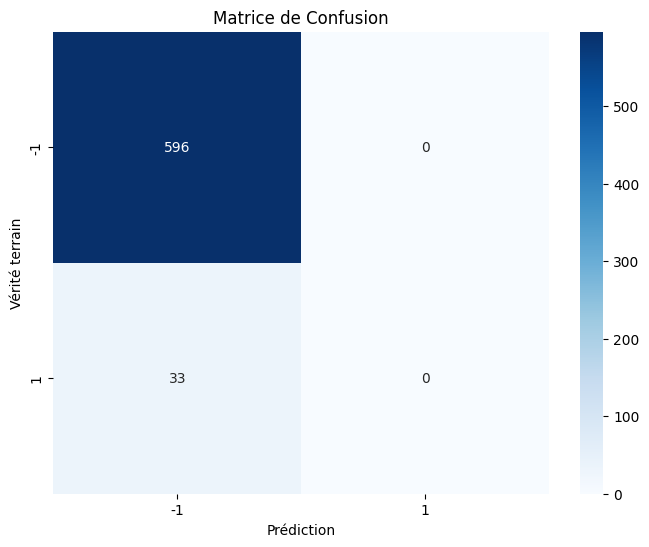


Validation croisée :
  Fold 1: 0.9600
  Fold 2: 0.9120
  Fold 3: 0.9680
  Fold 4: 0.9440
  Fold 5: 0.9535

Moyenne des performances : 0.9475
Écart-type : 0.0194

Matrice de confusion cumulée sur tous les folds :


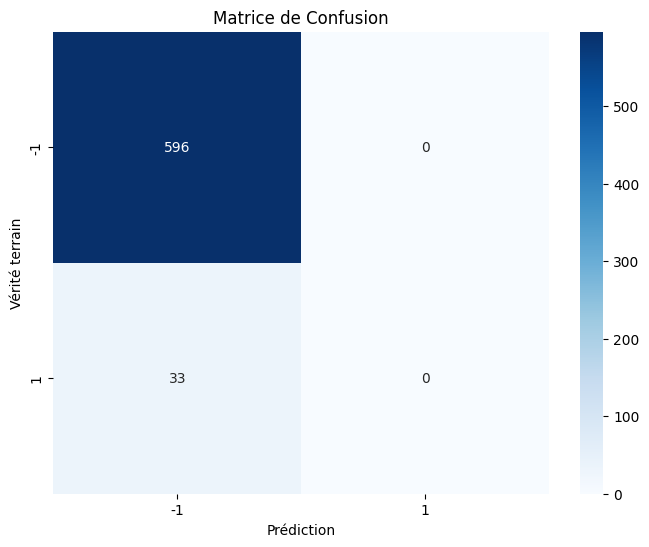

([0.96, 0.912, 0.968, 0.944, 0.9534883720930233],
 0.9474976744186046,
 0.019415769741541807)

In [89]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

bn_bin = classif.BernoulliNaiveBayes(input_dim)
ev.evaluer_classifieur(bn_bin, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)
ev.crossval(bn_bin,X_test,y_test_bin,5)

KNN Classifier - classification binaire - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9475
Temps d'évaluation : 2.3374 secondes


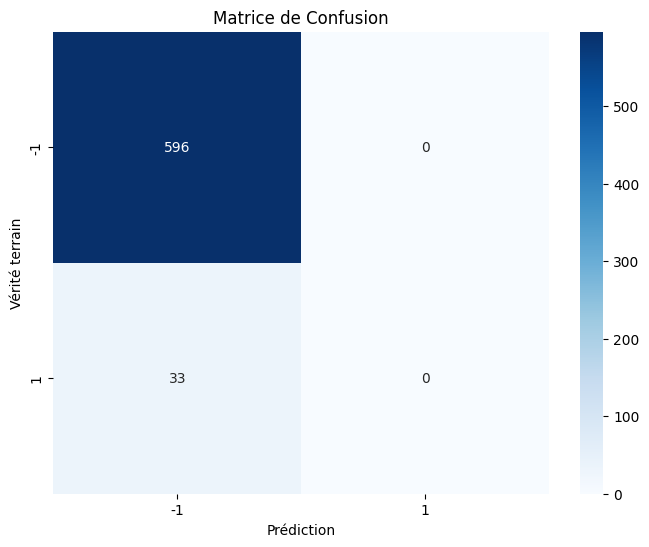


Validation croisée :
  Fold 1: 0.9426
  Fold 2: 0.9522
  Fold 3: 0.9479

Moyenne des performances : 0.9475
Écart-type : 0.0039

Matrice de confusion cumulée sur tous les folds :


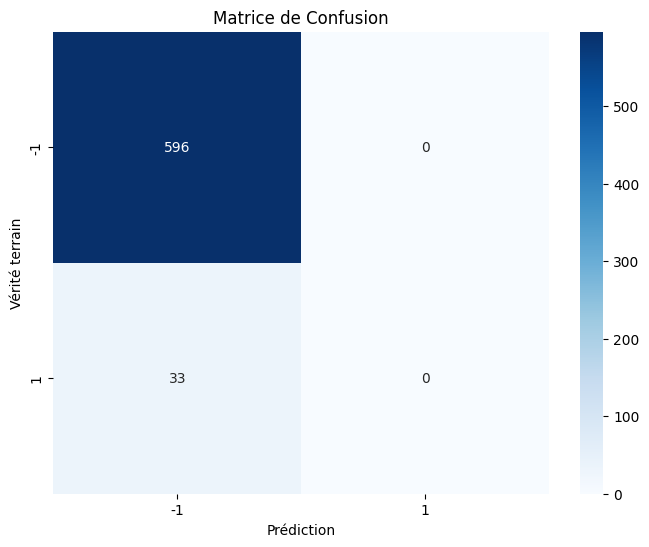

([0.9425837320574163, 0.9521531100478469, 0.9478672985781991],
 0.9475347135611542,
 0.003913754239951399)

In [35]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)



input_dim = X_train.shape[1]
k = 3
knn = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(knn,X_test,y_test_bin,3)

KNN Classifier - classification binaire - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9475
Temps d'évaluation : 4.4981 secondes


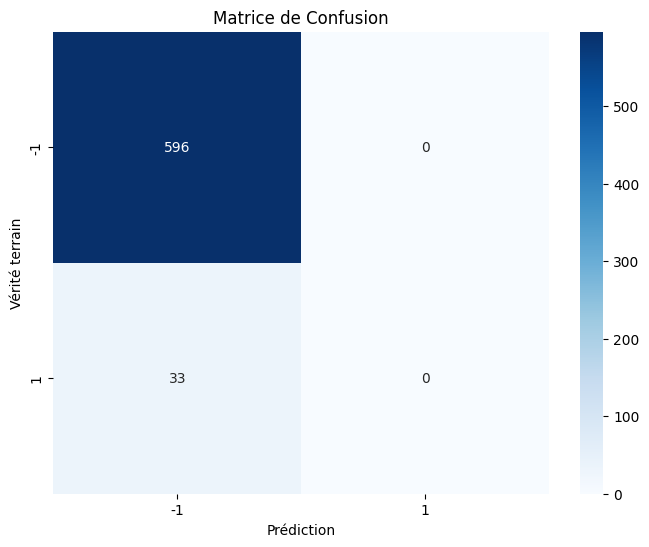


Validation croisée :
  Fold 1: 0.9522
  Fold 2: 0.9474
  Fold 3: 0.9431

Moyenne des performances : 0.9475
Écart-type : 0.0037

Matrice de confusion cumulée sur tous les folds :


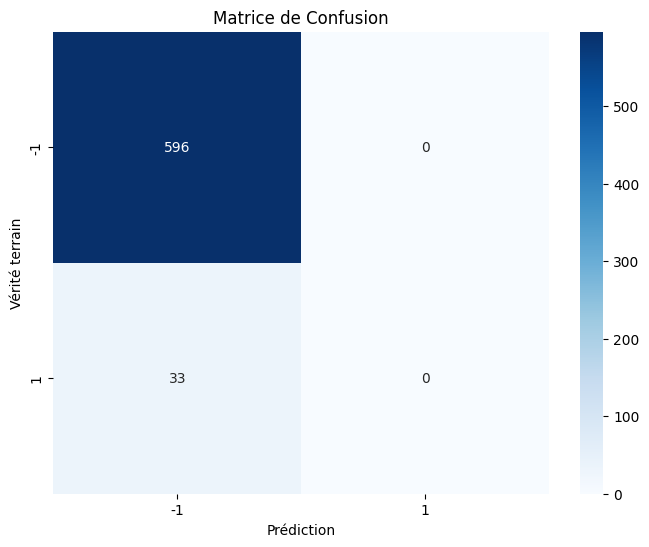

([0.9521531100478469, 0.9473684210526315, 0.943127962085308],
 0.9475498310619287,
 0.0036867335253161133)

In [36]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]
k = 5
knn2 = classif.ClassifierKNN(input_dim, k)

ev.evaluer_classifieur(knn2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)
ev.crossval(knn2,X_test,y_test_bin,3)

KNN Cosinus Classifier - classification binaire - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.9475
Temps d'évaluation : 2.7793 secondes


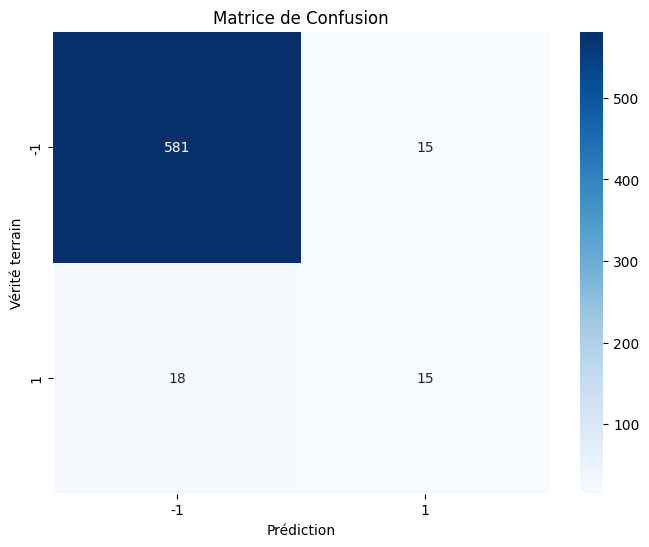


Validation croisée :
  Fold 1: 0.9522
  Fold 2: 0.9713
  Fold 3: 0.9526

Moyenne des performances : 0.9587
Écart-type : 0.0089

Matrice de confusion cumulée sur tous les folds :


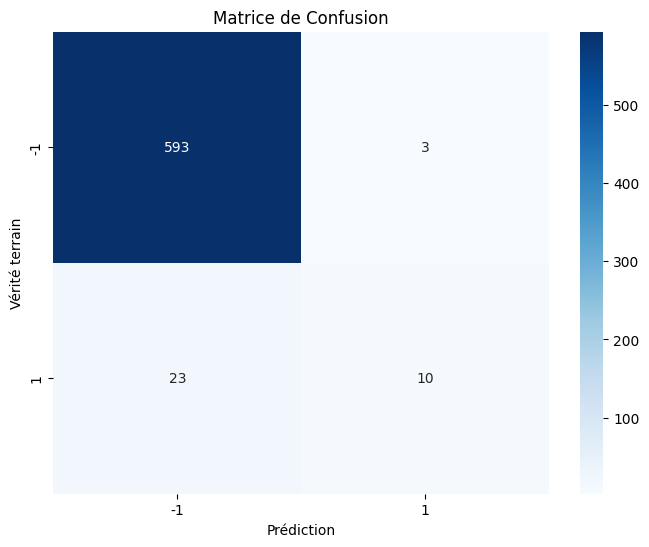

([0.9521531100478469, 0.9712918660287081, 0.95260663507109],
 0.9586838703825483,
 0.008917121616936892)

In [41]:
classe_positive = 3
input_dim = X_train.shape[1]
k = 5
knn_cos = classif.ClassifierKNNCosine(input_dim, k)

ev.evaluer_classifieur(knn_cos, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(knn_cos,X_test,y_test_bin,3)

KNN Classifier - multiclass - les 3 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.3005
Temps d'évaluation : 2.4447 secondes


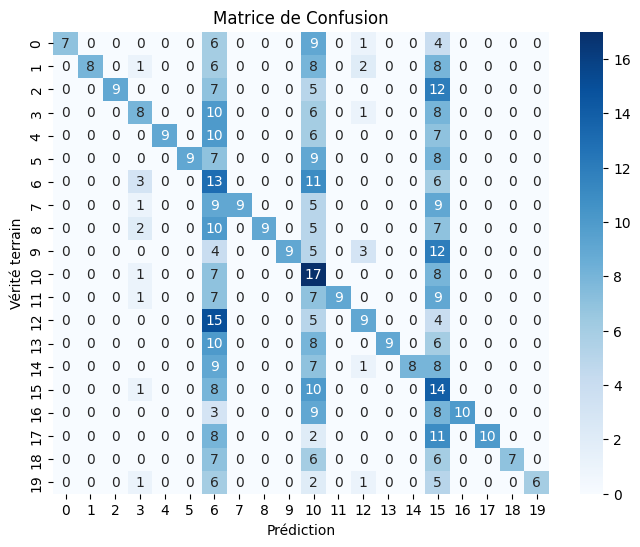


Validation croisée :
  Fold 1: 0.0622
  Fold 2: 0.0670
  Fold 3: 0.0616

Moyenne des performances : 0.0636
Écart-type : 0.0024

Matrice de confusion cumulée sur tous les folds :


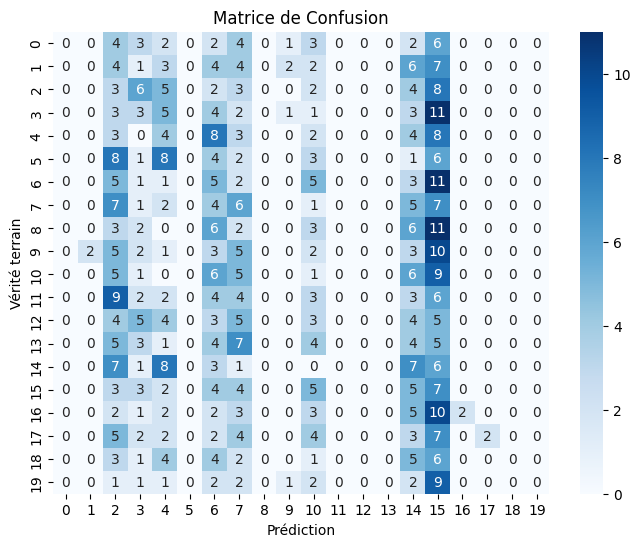

([0.06220095693779904, 0.06698564593301436, 0.061611374407582936],
 0.06359932575946545,
 0.0024065570328198824)

In [42]:
y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 3
knn_mult = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult,X_test,y_test,3)

KNN Classifier - multiclass - les 5 plus proches voisins

Entraînement...
Temps d'entraînement : 0.0000 secondes
Évaluation...
Accuracy : 0.3386
Temps d'évaluation : 2.5156 secondes


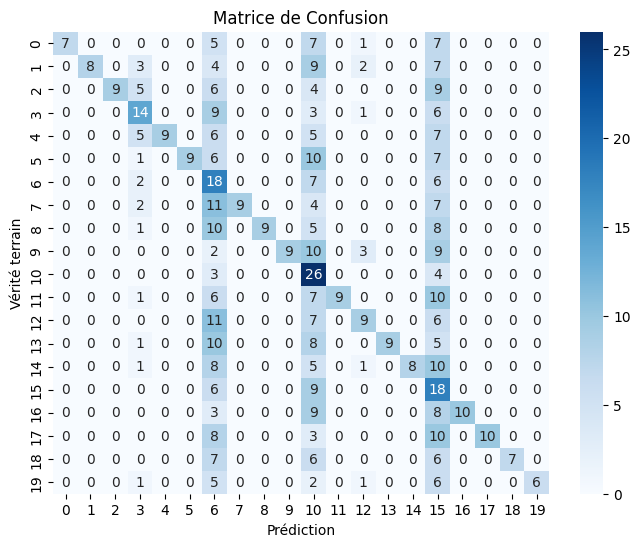


Validation croisée :
  Fold 1: 0.0766
  Fold 2: 0.0239
  Fold 3: 0.0474

Moyenne des performances : 0.0493
Écart-type : 0.0215

Matrice de confusion cumulée sur tous les folds :


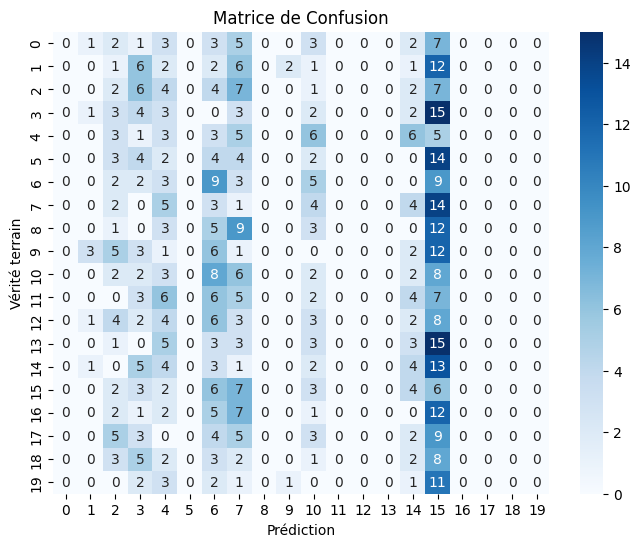

([0.07655502392344497, 0.023923444976076555, 0.04739336492890995],
 0.04929061127614382,
 0.021528592358378316)

In [43]:
y_train = np.array(train_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
input_dim = X_train.shape[1]
k = 5
knn_mult2 = classif.ClassifierKNNMulti(input_dim, k)

ev.evaluer_classifieur(knn_mult2, X_train, y_train, X_test, y_test, afficher_cm=True)

ev.crossval(knn_mult2,X_test,y_test,3)

Perceptron Classifier - classification binaire

Entraînement...
Temps d'entraînement : 0.0191 secondes
Évaluation...
Accuracy : 0.9141
Temps d'évaluation : 0.0099 secondes


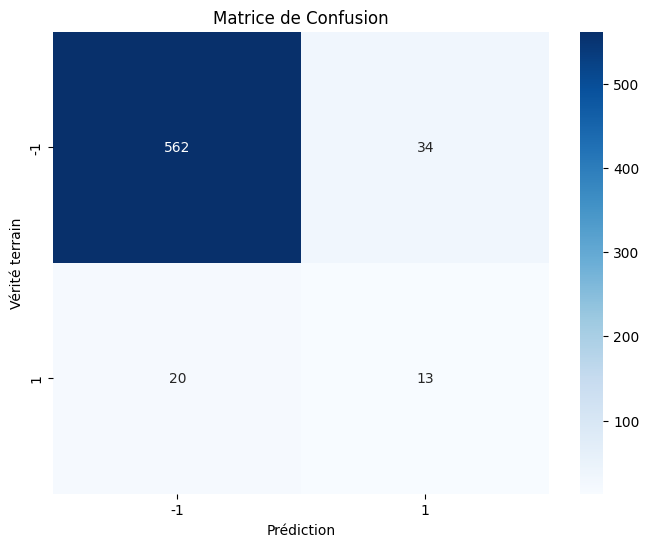


Validation croisée :
  Fold 1: 0.9120
  Fold 2: 0.9280
  Fold 3: 0.9120
  Fold 4: 0.9040
  Fold 5: 0.9302

Moyenne des performances : 0.9172
Écart-type : 0.0101

Matrice de confusion cumulée sur tous les folds :


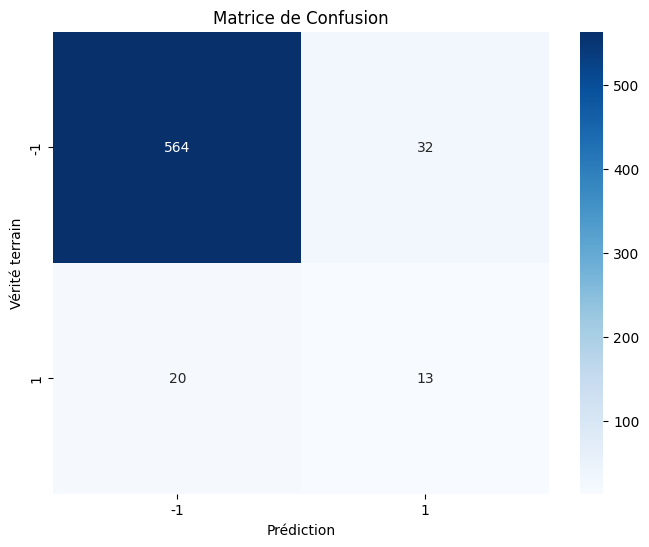

([0.912, 0.928, 0.912, 0.904, 0.9302325581395349],
 0.917246511627907,
 0.010146888735003488)

In [44]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron1 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron1, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron1,X_test,y_test_bin,5)

Entraînement...
Temps d'entraînement : 0.0129 secondes
Évaluation...
Accuracy : 0.8887
Temps d'évaluation : 0.0032 secondes


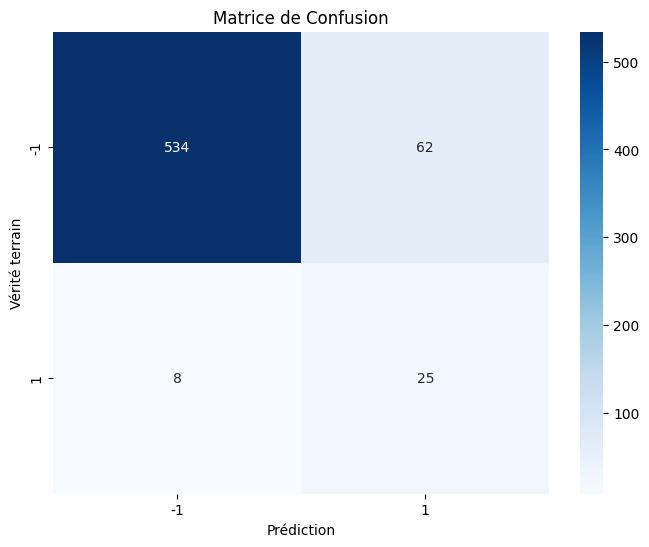


Validation croisée :
  Fold 1: 0.8880
  Fold 2: 0.9600
  Fold 3: 0.9200
  Fold 4: 0.9600
  Fold 5: 0.9225

Moyenne des performances : 0.9301
Écart-type : 0.0273

Matrice de confusion cumulée sur tous les folds :


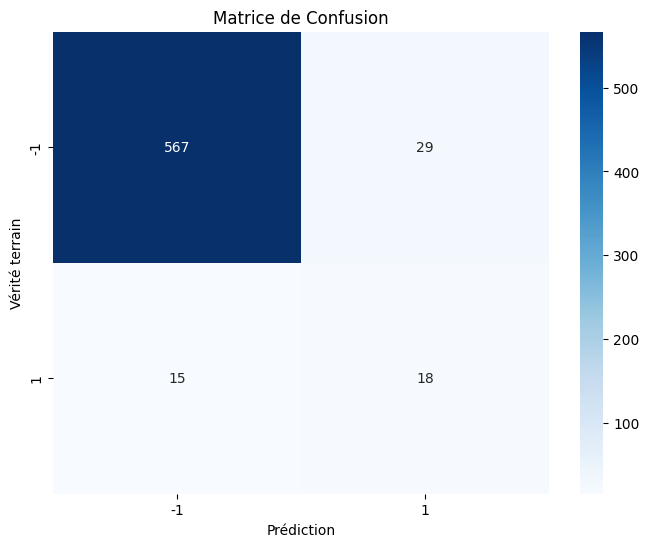

([0.888, 0.96, 0.92, 0.96, 0.9224806201550387],
 0.9300961240310077,
 0.027278177630135476)

In [45]:
classe_positive = 11
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)

input_dim = X_train.shape[1]

perceptron2 = classif.ClassifierPerceptron(input_dim)

ev.evaluer_classifieur(perceptron2, X_train, y_train_bin, X_test, y_test_bin, afficher_cm=True)

ev.crossval(perceptron2,X_test,y_test_bin,5)

## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
